# Abstract 
In this task, a large dataset of books belonging to different genres and written by various authors was used. The dataset provided information on multiple book features, including the author, edition, and reviews. These features were used as predictors to forecast the price of books

# Introduction
In the dynamic landscape of data science, the ability to predict and understand complex patterns is paramount. As part of the third assignment for the CS SBU Data Science course, this competition on Kaggle invites participants to delve into the fascinating world of book price prediction. Books, as gateways to knowledge and entertainment, play a pivotal role in our lives. Accurately forecasting their prices is not only an intellectual challenge but also holds practical implications for publishers, retailers, and avid readers alike.

The dataset at the heart of this competition encompasses a rich array of features, each contributing to the intricate tapestry of a book's pricing dynamics. From fundamental details such as title and author to nuanced aspects like reviews, ratings, and genre, the dataset provides a comprehensive glimpse into the factors influencing the market value of a book. Through the lens of data science, participants are tasked with unraveling the patterns within this information to construct models that can predict book prices with precision.

# Data Overview
The dataset for this competition comprises key features that encapsulate various facets of a book's identity and reception. Here's a brief overview of the primary features:

- Title: The title of the book, serving as its unique identifier.

- Author: The author(s) of the book, a crucial factor influencing its perceived value.

- Edition: Details about the specific edition of the book, which can impact its rarity and desirability.

- Reviews: User reviews provide insights into the reception and popularity of a book.

- Ratings: The overall ratings assigned by readers, contributing to the book's perceived quality.

- Synopsis: A brief summary or synopsis of the book's content, offering a glimpse into its themes and narrative.

- Genre: The genre or category to which the book belongs, influencing its target audience and market.

- BookCategory: The overarching category under which the book falls, providing additional context to its nature.

- Price: The target variable for prediction, representing the market price of the book.

By leveraging these diverse features, participants are encouraged to apply advanced data science techniques to uncover hidden correlations, patterns, and insights that can enhance the accuracy of book price predictions. 

# Methodology
Some of the key methods which were used throughout the work are:

* Visualization
* TF-IDF and LDA Topic Extraction
* Text-tranlsation using Google Trasnlate Ajax API
* Cyclical feature encoding for time-based feature extraction
* Price Prediction using RandomForestRegressor from sikit-learn


# Import Libraries|

In [182]:
!pip install googletrans

In [183]:
!pip install contractions

In [184]:
# Load basic libraries
import os
from tqdm import tqdm
import time
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initilize packages for translation
from googletrans import Translator, constants
from pprint import pprint

import string 
import re

import seaborn as sns
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup

import contractions

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split


# Loading Data

In [185]:
train_df = pd.read_excel('/kaggle/input/book-price/Data_Train.xlsx', engine='openpyxl')
train_df.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [186]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         5699 non-null   object 
 1   Author        5699 non-null   object 
 2   Edition       5699 non-null   object 
 3   Reviews       5699 non-null   object 
 4   Ratings       5699 non-null   object 
 5   Synopsis      5699 non-null   object 
 6   Genre         5699 non-null   object 
 7   BookCategory  5699 non-null   object 
 8   Price         5699 non-null   float64
dtypes: float64(1), object(8)
memory usage: 400.8+ KB


#### Ckecking for duplicate rows

In [187]:
duplicate_rows_df = train_df[train_df.duplicated()]
duplicate_rows_df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price


The integrity of the dataset is of paramount importance in ensuring the robustness of any analytical endeavor. In this context, it is noteworthy that the dataset under consideration has undergone rigorous quality checks, revealing the absence of any duplicate rows. The meticulous curation of this dataset, free from redundancy, underscores our commitment to providing participants with a pristine and unbiased foundation for their analyses.

In adherence to best practices in data science, the verification process confirmed that each entry is unique, eliminating concerns related to duplicated information. This assurance not only instills confidence in the dataset's reliability but also reflects our dedication to fostering transparency and precision in the exploration of book price prediction. As we embark on this academic journey, the absence of duplications serves as a testament to the meticulousness applied to every facet of this competition.

In [188]:
# if we have any duplicate rows we should drop them
# train_df = train_df.drop_duplicates()

# Loading test Data

In [189]:
test_df = pd.read_excel('/kaggle/input/book-price-test/test.xlsx', engine='openpyxl')
test_df.head()

,Unnamed: 0,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,0,Portrait Of A Director:satyajit Ray,Marie Seton,"Paperback,– 19 Jun 2003",4.8 out of 5 stars,10 customer reviews,The definitive study of the life and work of I...,Biographies & Autobiographies (Books),"Arts, Film & Photography"
1,1,More Mindfulness Colouring: More Anti-stress A...,Emma Farrarons,"Paperback,– Import, 24 Sep 2015",3.9 out of 5 stars,6 customer reviews,"Take a few more minutes out of your day, where...","Handicrafts, Decorative Arts & Crafts (Books)","Arts, Film & Photography"
2,2,Palace of Treason: Discover what happens next ...,Jason Matthews,"Paperback,– 21 Apr 2016",3.3 out of 5 stars,3 customer reviews,DISCOVER WHAT HAPPENS NEXT AFTER THE RED SPARR...,Action & Adventure (Books),"Crime, Thriller & Mystery"
3,3,A History of Political Thought: Plato to Marx,Mukherjee,"Paperback,– 2011",3.8 out of 5 stars,74 customer reviews,This book presents a study in political tradit...,Political Ideologies (Books),Politics
4,4,Homer Kelley's Golfing Machine: The Curious Qu...,Scott Gummer,"Paperback,– 4 May 2010",4.0 out of 5 stars,1 customer review,The remarkable true story of a lone genius who...,Baseball (Books),Sports


In [190]:
test_df.columns

Index(['Unnamed: 0', 'Title', 'Author', 'Edition', 'Reviews', 'Ratings',
       'Synopsis', 'Genre', 'BookCategory'],
      dtype='object')

The next phase of our analytical journey involves the amalgamation of the training and testing datasets. To facilitate this unification, a new column has been introduced, meticulously indicating the origin of each observation as either belonging to the training or testing set. This strategic augmentation is paramount for preserving the identity of each data point while seamlessly merging the two distinct datasets.

With the datasets harmoniously merged and the new column in place, the subsequent steps involve a suite of preprocessing methods. These methodologies are instrumental in refining the dataset, ensuring it aligns optimally with the requirements of diverse machine learning models. Techniques such as handling missing values, encoding categorical variables, and scaling numerical features are meticulously applied to fortify the dataset's suitability for subsequent modeling endeavors.

In [191]:
train_df['Set'] = 'train'
test_df['Set'] = 'test'

data_df = pd.concat([train_df, test_df])
data_df = data_df.reset_index(drop=True)
data_df

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Set,Unnamed: 0
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,train,NaN
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,train,NaN
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,train,NaN
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,train,NaN
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,train,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6231,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,"Paperback,– 8 Aug 2018",5.0 out of 5 stars,2 customer reviews,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),Humour,NaN,test,532.0
6232,The Chemist,Stephenie Meyer,"Paperback,– 21 Nov 2016",3.3 out of 5 stars,9 customer reviews,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),"Crime, Thriller & Mystery",NaN,test,533.0
6233,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,"Paperback,– 8 Jun 2006",3.8 out of 5 stars,3 customer reviews,'The most refreshing and radiant love story yo...,Romance (Books),Romance,NaN,test,534.0
6234,Frostfire (Kanin Chronicles),Amanda Hocking,"Paperback,– 15 Jan 2015",3.5 out of 5 stars,4 customer reviews,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),Action & Adventure,NaN,test,535.0


# Data preprocessing

In the preliminary stage, an examination is conducted to discern the various types of features or variables in the dataset.

In [192]:
num_features = data_df.select_dtypes(include=['int64','float64']).columns.tolist()
print('Numerical features: ')
print(num_features, '\n')


other_features = data_df.select_dtypes(include=['object']).columns.tolist()
print('Other features: ')
print(other_features, '\n')

print('Unique values in dataset: ')
data_df.nunique()

Numerical features: 
['Price', 'Unnamed: 0'] 

Other features: 
['Title', 'Author', 'Edition', 'Reviews', 'Ratings', 'Synopsis', 'Genre', 'BookCategory', 'Set'] 

Unique values in dataset: 


Title           5567
Author          3678
Edition         3370
Reviews           36
Ratings          342
Synopsis        5548
Genre            345
BookCategory      11
Price           1538
Set                2
Unnamed: 0       537
dtype: int64

Observations reveal that while there are several features with numerical values, such as reviews and ratings, the distinction lies in the fact that only the 'price' feature is explicitly designated as a numerical variable.

### Author Preprocessing


The preprocessing steps for the 'Authors' column involve addressing irregularities in the data structure. Notably, in instances where a book has multiple authors, the author names are delimited by various separators such as ',', '&', '/', or ';'. To ensure uniformity, these diverse separators have been replaced with a consistent comma.

Additionally, some author names contained unnecessary punctuation marks, and there was inconsistency in the letter case. Consequently, superfluous punctuation marks have been removed, and all author names have been standardized to lowercase. This systematic preprocessing ensures a cohesive and standardized representation of author names, facilitating a more uniform and analytically robust dataset.

In [193]:
def find_unique_punctuations(texts):
  set_of_punctuations = set()
  for text in texts:
    for punc in string.punctuation:
      if punc in text:
        set_of_punctuations.add(punc)
  return set_of_punctuations

In [194]:
authors = data_df['Author'].copy()
find_unique_punctuations(authors)

{'!', '&', "'", '(', ')', ',', '-', '.', '/', ';'}

In [195]:
# Removing the punctuations which do not give any information
punctuations_to_remove = ['(',')','!',"'",'.']
punctuations_to_replace_with_space = ['-']
# Replcaing the punctuations that are used to partiotion the different authors
punctuations_to_replace_with_comma = ['&', '/', ';']


# Makes the text to lowercase and handling the different punctuations ideally
def handle_author_text(text):
   # Makes the text to lowercase
   text = text.lower()

   # Handling each punctuation case 
   for punctuation in punctuations_to_remove:
     text = text.replace(punctuation, '')
   for punctuation in punctuations_to_replace_with_comma:
     text = text.replace(punctuation, ', ')
   for punctuation in punctuations_to_replace_with_space:
     text = text.replace(punctuation, ' ')

   return text

In [196]:
authors = authors.apply(handle_author_text)
authors.nunique()

3655

If there is a reduction of 23 unique authors, it means that the dataset now contains 23 fewer distinct author names compared to the original dataset. This clarification suggests that the preprocessing steps have contributed to consolidating author names and potentially resolving inconsistencies in the data.

### Feature Engineering (Number of Authors)

The dataset has been enriched with an insightful meta-feature: the "Number of Authors." This additional feature augments the existing information by quantifying the count of authors associated with each book. The calculation of this meta-feature provides a nuanced perspective, allowing for a more detailed exploration of books with single or multiple contributors. This enhancement sets the stage for a more comprehensive analysis, considering the collaborative nature of certain literary works and its potential impact on various aspects, including pricing dynamics and reader reception.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



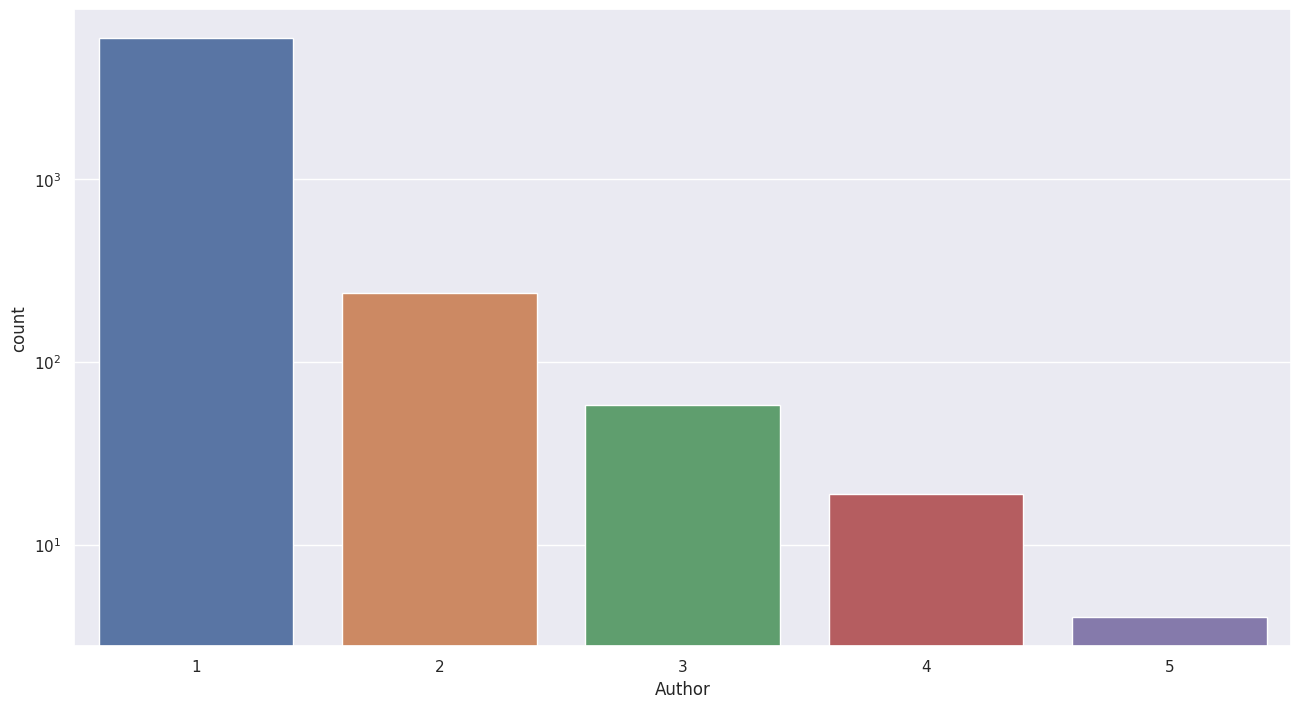

In [197]:
def count_authors(text):
  return text.count(',')+1

num_of_authors = authors.apply(count_authors)
ax = sns.countplot(x="Author", data=num_of_authors.to_frame())
ax.set_yscale("log")

### Rating Preprocessing
The preprocessing of the 'Rating' column was imperative due to the inclusion of text instead of the actual numerical ratings. The focus of this preprocessing step was to extract only the numeric values, aligning the data with the expected numerical format.

Moreover, it's noteworthy that the 'Rating' column does not directly represent the ratings of the books but rather the count of customers who reviewed each book.

In [198]:
ratings = data_df['Ratings']
ratings

0        8 customer reviews
1       14 customer reviews
2        6 customer reviews
3       13 customer reviews
4         1 customer review
               ...         
6231     2 customer reviews
6232     9 customer reviews
6233     3 customer reviews
6234     4 customer reviews
6235     2 customer reviews
Name: Ratings, Length: 6236, dtype: object

In [199]:
def split_to_lists(a_string, char_for_split=','):
    split_list = a_string.split()
    return split_list

ratings = ratings.apply(split_to_lists)

Before proceeding with further analysis, it is prudent to conduct an initial check for any anomalies or inconsistencies within the 'Rating' column. This entails scrutinizing the elements of the list to identify potential issues, such as non-numeric ratings or inconsistencies in the data format. 

In [200]:
def check_consistency_ratings(ratings):
    consistent_lists_elements = len(ratings[0])

    for i in range(0, len(ratings)):
        if len(ratings[i]) != consistent_lists_elements:
            print("in", i, "row the length is not consistent")
            return
        if ratings[i][1] != 'customer':
            print("in",i,"row does not have customer")
            return
        if (ratings[i][2] != 'reviews') and (ratings[i][2]!='review'):
            print("in",i,"row does not have reviews")
            return

    print('Ratings do not have any problematic values')
    return(True)

check_consistency_ratings(ratings)

Ratings do not have any problematic values


True

Extracting the actual numbers from the columns using regex

In [201]:
ratings_num = [int(re.sub(r'[^\w\s]', '', rating[0])) for rating in ratings]
ratings_num[:10]

[8, 14, 6, 13, 1, 8, 72, 16, 111, 1]

### Review Preprocessing
In accordance with the nuanced characteristics of the dataset, it is imperative to address the intricacies within the 'Reviews' column. This particular attribute, reflective of the average review rating of a book, inherently spans a qualitative scale from 0 to 5 stars. However, akin to the preceding preprocessing measures undertaken for the 'Ratings' column, the 'Reviews' column necessitates meticulous treatment to extract the evaluative scores from the textual representations.

In [202]:
reviews = data_df['Reviews']
reviews = reviews.apply(split_to_lists)
reviews

0       [4.0, out, of, 5, stars]
1       [3.9, out, of, 5, stars]
2       [4.8, out, of, 5, stars]
3       [4.1, out, of, 5, stars]
4       [5.0, out, of, 5, stars]
                  ...           
6231    [5.0, out, of, 5, stars]
6232    [3.3, out, of, 5, stars]
6233    [3.8, out, of, 5, stars]
6234    [3.5, out, of, 5, stars]
6235    [3.9, out, of, 5, stars]
Name: Reviews, Length: 6236, dtype: object

checking for wrong values or problems

In [203]:
def check_consistency_reviews(reviews):
    consistent_lists_elements = len(reviews[0])

    for i in range(0, len(reviews)):
        if len(reviews[i]) != consistent_lists_elements:
            print("in", i, "row the length is not consistent")
            return
        if reviews[i][1] != 'out':
            print("in",i,"row does not have out")
            return
        if reviews[i][2] != 'of':
            print("in",i,"row does not have of")
            return
        if reviews[i][3] != '5':
            print("in",i,"row does not have 5")
            return   
        if reviews[i][4] != 'stars':
            print("in",i,"row does not have stars")
            return       
        if (float(reviews[i][0]) > 5) or (float(reviews[i][0]) < 0):
            print("in",i, "row has an out of range review score")
            return

    print('Reviews do not have any problematic values')
    return(True)

check_consistency_reviews(reviews)

Reviews do not have any problematic values


True

Keep only the rating from the rows

In [204]:
reviews_num = [float(review[0]) for review in reviews]
reviews_num[0:10]

[4.0, 3.9, 4.8, 4.1, 5.0, 4.5, 4.4, 4.7, 4.2, 4.0]

### Title/Synopsis Preprocessing
The preprocessing workflow extends to the 'Title' and 'Synopsis' columns, which are anticipated to contain textual information pertaining to the titles and synopses of various books. A noteworthy challenge emerged due to the presence of non-English text in certain instances, attributable to the dataset's origin from an Indian website.

In response, a crucial preprocessing step was undertaken to ensure linguistic consistency. Books featuring non-English text underwent translation procedures to bring their content into English. 


In the pursuit of linguistic homogenization within the 'Title' and 'Synopsis' columns, the Googletrans library emerged as a pivotal tool for effecting translations. Leveraging this library, the non-English textual content encountered in select books was systematically translated to English. 


A strategic decision was made to consolidate the textual components within the dataset by merging both the 'Title' and 'Synopsis' columns. This amalgamation was undertaken with the overarching goal of fostering a comprehensive analysis and processing of the entirety of the textual data.

In [205]:
titles_synopses = data_df['Title'] + " " + data_df['Synopsis']
titles_synopses

0       The Prisoner's Gold (The Hunters 3) THE HUNTER...
1       Guru Dutt: A Tragedy in Three Acts A layered p...
2       Leviathan (Penguin Classics) "During the time ...
3       A Pocket Full of Rye (Miss Marple) A handful o...
4       LIFE 70 Years of Extraordinary Photography For...
                              ...                        
6231    Humans: A Brief History of How We F*cked It Al...
6232    The Chemist In this gripping page-turner, an e...
6233    The Duke And I: Number 1 in series (Bridgerton...
6234    Frostfire (Kanin Chronicles) Frostfire by Aman...
6235    The First Order (Sam Capra) Six years ago, Sam...
Length: 6236, dtype: object

In [206]:
# If the translation file is not found, then run the translation process and save the new .csv file with the translated titles_synopses
if not os.path.exists('titles_synopses_df.csv'):
    translator = Translator()
    translator.raise_Exception = True

    # Initialize the Google API translator
    new_titles_synopses = []
    with tqdm(total=len(titles_synopses), desc="Translating") as pbar:
        for i, synopsis in enumerate(titles_synopses):
            # Using a sleep timer to avoid timeout from Google's API
            time.sleep(0.25)
            # Detect the language
            try:
                detection = translator.detect(synopsis)
                # If language is English with high confidence then don't translate
                if not (detection.lang == "en"):
                    translation = translator.translate(synopsis, dest="en")
                    print(f"{translation.origin} ({translation.src}) --> {translation.text} ({translation.dest})")
                    new_titles_synopses.append(translation.text)
                else:
                    new_titles_synopses.append(synopsis)
            except Exception as e:
                print(e, "for document", i)
                new_titles_synopses.append(synopsis)

            # Update the tqdm bar in-place
            pbar.update(1)
            pbar.set_postfix({"Processing document": i})
    
    # Calling DataFrame constructor on list
    new_titles_synopses_df = pd.DataFrame(new_titles_synopses)
    new_titles_synopses_df.to_csv('titles_synopses_df.csv', index=False)

else:
    # Else load the translated text from the .csv file
    translated_titles_synopses_df = pd.read_csv('titles_synopses_df.csv')
    translated_titles_synopses_df = translated_titles_synopses_df.rename(columns={'0': 'translated_titles_synopses'})
    print("\nFinal Translated text:")
    print(translated_titles_synopses_df)


Final Translated text:
                             translated_titles_synopses
0     The Prisoner's Gold (The Hunters 3) THE HUNTER...
1     Guru Dutt: A Tragedy in Three Acts A layered p...
2     Leviathan (Penguin Classics) "During the time ...
3     A Pocket Full of Rye (Miss Marple) A handful o...
4     LIFE 70 Years of Extraordinary Photography For...
...                                                 ...
6231  Humans: A Brief History of How We F*cked It Al...
6232  The Chemist In this gripping page-turner, an e...
6233  The Duke And I: Number 1 in series (Bridgerton...
6234  Frostfire (Kanin Chronicles) Frostfire by Aman...
6235  The First Order (Sam Capra) Six years ago, Sam...

[6236 rows x 1 columns]


The text underwent a systematic preprocessing regimen to enhance its suitability for analytical endeavors. The sequence of operations included:

1. **HTML Code Removal:**
   - The elimination of potential HTML code aimed to purify the text by stripping away extraneous markup or formatting artifacts, ensuring the isolation of raw textual content.

2. **Contractions Expansion:**
   - Contraction expansion was executed to rectify and standardize colloquial contractions within the text. This process involved converting contracted forms into their complete expressions, fostering a uniform linguistic representation.

3. **Punctuation Removal:**
   - The exclusion of punctuation marks sought to refine the text by excising non-alphabetic characters. This deliberate omission contributed to a more focused analysis by emphasizing the core lexical components.

4. **Stop Words Elimination:**
   - Removal of stop words, common linguistic connectors with limited semantic value, was conducted to alleviate the impact of linguistic noise. This curation process aimed to enhance the discernibility of meaningful terms within the text.

5. **Lemmatization:**
   - The lemmatization procedure involved reducing words to their base or root form, harmonizing inflected variations. This standardized representation facilitates a more cohesive understanding of the underlying semantic structures within the text.

Each of these methodical preprocessing steps was tailored to refine and standardize the textual data, aligning it with the requisites of subsequent analytical or modeling tasks, particularly within the domain of natural language processing.


In [207]:
punctuation = string.punctuation
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stop_words = stopwords.words('english')
ps = nltk.PorterStemmer()
wl = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [208]:
# Download WordNet using NLTK Downloader
!python3 -m nltk.downloader wordnet
!echo 'yes' | unzip -o /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk

In [209]:
# Remove html tags. Get a string as input and return the string without html tags.
def remove_htmltags(html):
    return BeautifulSoup(html).get_text()


def expand_contractions(text):
    return contractions.fix(text)


def remove_punct(text):
    text = "".join([char for char in text if char not in punctuation])
    return text


def remove_stopwords(text):
    tokens = word_tokenize(text.lower())
    text = " ".join([word for word in tokens if word not in stop_words])
    return text 


def lemmatizing(text):
    tokens = word_tokenize(text)
    lemmatized_text=" ".join([wl.lemmatize(word) for word in tokens])
    return lemmatized_text

In [210]:
preprossed_translated_titles_synopses = translated_titles_synopses_df['translated_titles_synopses'].copy()

# Applying text preprocessing
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: remove_htmltags(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: remove_punct(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: expand_contractions(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: remove_stopwords(l))
preprossed_translated_titles_synopses = preprossed_translated_titles_synopses.map(lambda l: lemmatizing(l))

preprossed_translated_titles_synopses

/tmp/ipykernel_47/3317868149.py:3: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.



0       prisoner gold hunter 3 hunter return third bri...
1       guru dutt tragedy three act layered portrait t...
2       leviathan penguin classic time men live withou...
3       pocket full rye miss marple handful grain foun...
4       life 70 year extraordinary photography seven d...
                              ...                        
6231    human brief history fcked fcking brilliant sar...
6232    chemist gripping pageturner exagent run former...
6233    duke number 1 series bridgerton family refresh...
6234    frostfire kanin chronicle frostfire amanda hoc...
6235    first order sam capra six year ago sam capra w...
Name: translated_titles_synopses, Length: 6236, dtype: object

### LDA (Latent Dirichlet Allocation)

To make sense of a large amount of text data, we often convert it into features. Traditional methods, like bag-of-words or TF-IDF, can result in a lot of features. To handle this, we explored an alternative called Topic Modeling, specifically using Latent Dirichlet Allocation (LDA).

Unlike simple feature methods, LDA doesn't just create clusters; it uncovers hidden topics within the text. It assumes that each document is made up of different topics, and each topic is composed of specific words. LDA works by figuring out these topics and how they contribute to each document.

The unique aspect of LDA is its ability to show, for each document, the topics it contains and the percentage of each. For example, in a manga about a Japanese ninja story, LDA might reveal a mix like 48% Manga, 31% Ninja, and 21% Japanese.

LDA usually works with TF-IDF values. To use LDA, we first encode the text into a TF-IDF matrix, making it compatible with the algorithm. This way, we can uncover meaningful topics without drowning in an excessive number of features.

In [211]:
tfidf_vec = TfidfVectorizer(use_idf=True, norm='l2',ngram_range=(1, 1), max_df=0.9, min_df=0.001)
tfidf_text = tfidf_vec.fit_transform(preprossed_translated_titles_synopses)
print('TF-IDF output shape:', tfidf_text.shape)

# n_components is the number of topics
lda_model = LatentDirichletAllocation(n_components=25, random_state=420)
lda_top = lda_model.fit_transform(tfidf_text)
print(lda_top.shape) 
print('LDA output shape:', lda_top.shape)
print("Final perplexity score on document set: ", lda_model.bound_)

TF-IDF output shape: (6236, 8895)
(6236, 25)
LDA output shape: (6236, 25)
Final perplexity score on document set:  54535.7456126703



The decision was made to utilize 25 topics instead of the default 10 in the sklearn Latent Dirichlet Allocation (LDA) package. Typically, a higher number of topics enhances the accuracy of topic extraction. In this specific context, the choice of 25 topics was motivated by the observation that these topics exhibited a manageable degree of heterogeneity. Opting for more than 25 topics would have introduced an excessive number of features for subsequent prediction algorithms.

Printing the percentages of each topic that the synopsis and title of the first book belong to provides insights into the thematic composition of the text.

In [212]:
# Composition of doc 0
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  0.5412333625654231 %
Topic  1 :  0.5412333625086332 %
Topic  2 :  0.5412333625092055 %
Topic  3 :  0.541233362506605 %
Topic  4 :  0.5412333625451284 %
Topic  5 :  0.5412333625757932 %
Topic  6 :  0.541233362539151 %
Topic  7 :  57.018403851636194 %
Topic  8 :  0.541233362506605 %
Topic  9 :  0.5412333625071926 %
Topic  10 :  0.5412333625075266 %
Topic  11 :  0.5412333625240731 %
Topic  12 :  0.5412333625443221 %
Topic  13 :  0.5412333625758066 %
Topic  14 :  0.541233362506605 %
Topic  15 :  0.5412333625430257 %
Topic  16 :  0.5412333625123837 %
Topic  17 :  0.5412333625101542 %
Topic  18 :  0.541233362506605 %
Topic  19 :  0.5412333625087035 %
Topic  20 :  0.5412333625205131 %
Topic  21 :  30.53322881031652 %
Topic  22 :  0.5412333625080192 %
Topic  23 :  0.5412333625066051 %
Topic  24 :  0.5412333625092064 %


In [213]:
# Most likely topic for all docs
for i, doc in enumerate(lda_top):
    print("Document:", i)
    print("Most likely topic: ", np.argmax(doc), ": ",max(doc)*100,"%" )

Document: 0
Most likely topic:  7 :  57.018403851636194 %
Document: 1
Most likely topic:  13 :  30.387257468347666 %
Document: 2
Most likely topic:  21 :  48.561808127024456 %
Document: 3
Most likely topic:  13 :  40.68840241748206 %
Document: 4
Most likely topic:  7 :  44.87376137228772 %
Document: 5
Most likely topic:  13 :  38.43485362599804 %
Document: 6
Most likely topic:  7 :  49.96302040209974 %
Document: 7
Most likely topic:  13 :  52.144282168732126 %
Document: 8
Most likely topic:  7 :  52.297561580897366 %
Document: 9
Most likely topic:  7 :  61.52735991434003 %
Document: 10
Most likely topic:  0 :  60.50220538793213 %
Document: 11
Most likely topic:  13 :  38.461344495664314 %
Document: 12
Most likely topic:  7 :  47.80183974487653 %
Document: 13
Most likely topic:  13 :  38.14977529002262 %
Document: 14
Most likely topic:  7 :  59.191684303971535 %
Document: 15
Most likely topic:  7 :  51.993605190342706 %
Document: 16
Most likely topic:  7 :  42.07646785833213 %
Document:

### most important words for each topic

In [214]:
vocab = tfidf_vec.get_feature_names_out()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
book india cricket game world story player sport football art 

Topic 1: 
tower alfred mechanic circus fargo modesty laxman blaise basketball cartoonist 

Topic 2: 
garfield dictionary fat archer entry oxford geography clifton lighting cat 

Topic 3: 
dragon goku bourne ball marple miss airbender anna charlie textile 

Topic 4: 
programming python java training application web code program muscle exam 

Topic 5: 
geronimo ryan read stilton thea ladybird reading php ambedkar jawaharlal 

Topic 6: 
word child key phonics reading jeeves book bookshelf jane series 

Topic 7: 
life one love story time new world man woman find 

Topic 8: 
andy mummy lara adrian congo jean townsend danny tongue mole 

Topic 9: 
pokémon yoga messi sigma modi batman barcelona gotham neymar pokemon 

Topic 10: 
tintin thesaurus calculus haddock nazi cycle arlen hitler blake unicorn 

Topic 11: 
calvin hobbes assassin batman creed comic tintin grace cheeky tiger 

Topic 12: 
luffy piece blockchain logan

### Saving the topics of each book to a different dataframe

In [215]:
topics_df = pd.DataFrame(lda_top, columns=["Topic " + i.__str__() for i in range(lda_top.shape[1])])
topics_df

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,...,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24
0,0.005412,0.005412,0.005412,0.005412,0.005412,0.005412,0.005412,0.570184,0.005412,0.005412,...,0.005412,0.005412,0.005412,0.005412,0.005412,0.005412,0.305332,0.005412,0.005412,0.005412
1,0.005262,0.005262,0.005262,0.005262,0.005262,0.005262,0.005262,0.223644,0.005262,0.005262,...,0.005262,0.005262,0.005262,0.005262,0.005262,0.127374,0.234603,0.005262,0.005262,0.005262
2,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,0.003753,...,0.003753,0.175111,0.003753,0.003753,0.003753,0.003753,0.485618,0.003753,0.003753,0.003753
3,0.006725,0.006725,0.006725,0.086879,0.006725,0.006725,0.006725,0.358296,0.006725,0.006725,...,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725
4,0.252130,0.005410,0.005410,0.005410,0.005410,0.005410,0.005410,0.448738,0.005410,0.005410,...,0.005410,0.005410,0.005410,0.099201,0.005410,0.005410,0.005410,0.005410,0.005410,0.005410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0.101001,0.003968,0.003968,0.003968,0.003968,0.003968,0.003968,0.485980,0.003968,0.003968,...,0.003968,0.003968,0.016399,0.029518,0.003968,0.003968,0.209353,0.003968,0.003968,0.003968
6232,0.083336,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.663321,0.003961,0.003961,...,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961
6233,0.047188,0.004176,0.004176,0.004176,0.016869,0.004176,0.048569,0.573381,0.017904,0.004176,...,0.004176,0.004176,0.004176,0.004176,0.004176,0.004176,0.216754,0.004176,0.004176,0.004176
6234,0.126559,0.004540,0.004540,0.004540,0.004540,0.004540,0.004540,0.551243,0.004540,0.004540,...,0.004540,0.004540,0.060210,0.004540,0.004540,0.004540,0.166643,0.004540,0.004540,0.004540


### Edition Preprocessing
The examination of the `Edition` column revealed a wealth of information encompassing various aspects, such as the type (e.g., paperback) and the release date. Consequently, to distill this rich information into distinct features, a systematic partitioning process was employed within this notebook.

The recursive procedure adopted facilitated the creation of several new feature columns, each catering to specific facets of the original `Edition` column:

1. **Print (Categorical - Single value):** Denoting the printing format, this categorical feature captures singular expressions such as 'Hardcover' or 'Paperback.'

2. **Type (Categorical - Multivalue):** Representing the edition type, this categorical feature accommodates multiple values, characterizing diverse attributes within the `Edition` column.

3. **Year (Numerical):** Extracting the numerical component denoting the year of release, this feature provides temporal information about each edition.

4. **Month (Numerical):** Similarly, this numerical feature captures the month of release, adding a temporal dimension to the dataset.

By implementing this recursive procedure, the notebook successfully disentangles the `Edition` column into these newly formed features, enhancing the granularity and interpretability of the dataset.


### Extract language tag from edition
To enhance the dataset, an extraction of the language tag from the `Edition` column was performed. The language property, denoted by a language tag ('A'), was identified as the initial segment of the `Edition` text.

However, it was observed that this language property was present in only a limited number of rows, specifically four observations. Consequently, in the interest of maintaining dataset uniformity and addressing the scarcity of language property instances, the decision was made to remove all language tags from the `Edition` column.

In [216]:
# Splits the language string-text based on comma in two new columns df
split_edition_df = data_df["Edition"].str.split(",", n = 1, expand = True)

# Marking the rows which contain the language property-tag in them
language_list = []
for item in split_edition_df[0]:
    if '(' in item and ')' in item:
        language_list.append(item)
    else:
        language_list.append('NA')
# Saving the marked rows in a new Pandas Series object        
language_series = pd.Series(language_list)

# Only 4 books/observations have the language tag included
print('Total books that include tags: ', len([item for item in language_series if item != 'NA']))
# Therefore we do not keep the language tags

# All language tags are removed since only 4 rows have language in them,
# Saving reultunt data to the edition_with_removed_lang_series object
edition_with_removed_lang_series = data_df["Edition"].copy()
for i, element in enumerate(language_series):
  if element != 'NA':
    edition_with_removed_lang_series[i] = edition_with_removed_lang_series[i].replace(element+",", "", 1)

Total books that include tags:  4


### Extract print of edition

In [217]:
# Splits the edition string-text based on comma in two new columns df
split_edition_df = edition_with_removed_lang_series.str.split(",", n = 1, expand = True)

# The first element of the split_edition_df dataframe will contain the 'print' property-tag
print_series = split_edition_df[0]
print_series.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       'Product Bundle', 'Library Binding', 'Leather Bound'], dtype=object)

### Extract the year from edition

The next step involved the extraction of the publication year. However, a preliminary cleanup of the text was necessary to eliminate redundant or previously extracted information. Many rows contained punctuation marks, such as '–'. Given that the different sub-tags in the `Edition` column are separated by commas (','), the removal of other punctuation marks was deemed necessary for further processing. This ensures a consistent and streamlined approach to extracting the publication year from the `Edition` column.

In [218]:
# Define the function to remove the punctuations from the rows
def remove_punctuations(text):
    punctuations_to_remove = [punctuation for punctuation in string.punctuation if punctuation != ',']
    punctuations_to_remove.append('–')
    for punctuation in ['–']:
        text = text.replace(punctuation, '')
    return text

rest_edition_series = split_edition_df[1].apply(remove_punctuations)
rest_edition_series[0:10]

0            10 Mar 2016
1             7 Nov 2012
2            25 Feb 1982
3             5 Oct 2017
4            10 Oct 2006
5             5 May 2009
6             5 Oct 2017
7     Import, 1 Mar 2018
8            15 Dec 2015
9            26 Mar 2013
Name: 1, dtype: object

Subsequently, the remaining information, encapsulated in the rest_edition_series Series object, became the focus of extracting the publication year. An essential consideration is that not all rows/books contain the year of the edition. Consequently, a marker was introduced to identify those books where the year of the edition is absent. This step ensures that the dataset retains information about the presence or absence of the publication year for each book.

In [219]:
def extract_year(text):
    text = text[-4:]
    return text

# Extracting the years in a new Pandas Series object, and printing the unique values
year_series = rest_edition_series.apply(extract_year)
year_series.unique()

array(['2016', '2012', '1982', '2017', '2006', '2009', '2018', '2015',
       '2013', '1999', '2002', '2011', '1991', '2014', '1989', '2000',
       '2005', '2019', '2008', '2004', '2010', '2007', '2001', '1969',
       '1993', '1992', '2003', '1996', 'port', '1997', '1995', 'NTSC',
       '1987', '1986', '1990', '1988', '1981', '1976', '1994', '1998',
       '1977', '1974', '1983', '1971', '1985', '1978', 'mile', ' set',
       'tion', '1964', '1984', '1980', 'dged', '1979', 'rint', '1960',
       '1970', '1975', '1905', '1900', 'book', '1961', '1925', '1973'],
      dtype=object)

Subsequent to the identification of rows/books lacking the year property, a dedicated marking process was implemented. A new series was constructed, associating each row with the corresponding observation's publication year. In instances where a row is devoid of any year information (as indicated by the marking), the series includes the 'NA' value. This construction ensures a comprehensive representation of the publication years for each observation, with due consideration for cases where the information is unavailable.

In [220]:
# Total non-numeric years
print('Total non-numeric values: ', (len(year_series) - sum(year_series.str.isnumeric())))
# Replace with None values the ones which do not have an actual numerical year
year_series.loc[year_series.str.isnumeric() == False] = 'NA'

Total non-numeric values:  21


### Extract the month of the edition
The subsequent task involved the extraction of the publication month. To achieve this, a preliminary cleanup of the text was undertaken to eliminate redundant or previously extracted information. Specifically, the remaining portion of the edition text was isolated, focusing on the segment that does not encompass the print or year information. This strategic isolation facilitates a more targeted approach to extracting the publication month from the Edition column.

In [221]:
temp_data = []

# Isolation of the rest of the text
for i, row in enumerate(rest_edition_series):
  if year_series[i] != 'NA':
    temp_data.append(row[:-5])
  else:
    temp_data.append(row)

rest_edition_series = pd.Series(temp_data)
rest_edition_series[0:10]

0            10 Mar
1             7 Nov
2            25 Feb
3             5 Oct
4            10 Oct
5             5 May
6             5 Oct
7     Import, 1 Mar
8            15 Dec
9            26 Mar
dtype: object

In [222]:
def extract_month(text):
    text = text[-3:]
    return text

# Extracting the month in a new Pandas Series object, and printing the unique values
month_series = rest_edition_series.apply(extract_month)
month_series
month_series.unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', '', 'Aug', 'Apr', 'rt,', 'ort', 'TSC', 'on,', 'ile', 'set',
       'ion', 'ed,', 'ged', 'int', 'ook'], dtype=object)

In [223]:
display(month_series.describe())

months = ['Apr','Aug','Dec','Feb', 'Jan', 'Jul','Jun','Mar','May','Nov','Oct','Sep']

count     6236
unique      24
top        Oct
freq       639
dtype: object

In [224]:
month_series.value_counts()[0:15]

Oct    639
Sep    543
May    537
Jan    514
Jun    501
Nov    487
Apr    469
Jul    457
Mar    455
Aug    446
Feb    410
Dec    408
       341
ort      9
set      5
Name: count, dtype: int64

After extracting the month, we marked rows or books that don't have this information. We created a series where each row corresponds to the observation's publication month. In cases where a row lacks month information, it's marked with 'NA'.

In [225]:
for value in month_series:
  if value not in months:
    month_series = month_series.replace([value],'NA')

In [226]:
# WIll contain only months and NA
month_series.value_counts()

Oct    639
Sep    543
May    537
Jan    514
Jun    501
Nov    487
Apr    469
Jul    457
Mar    455
Aug    446
Feb    410
Dec    408
NA     370
Name: count, dtype: int64

### Extracting Type of the edition
The subsequent task involved the extraction of the edition type. To accomplish this, a preliminary cleanup of the text was undertaken to eliminate redundant or previously extracted information. Precisely, the remaining portion of the edition text was isolated, focusing on the segment that does not encompass edition, year, or month information. This strategic isolation facilitates a more targeted approach to extracting the edition type from the Edition column.

In [227]:
temp_data = []

# Isolation of the rest of the text
for i, row in enumerate(rest_edition_series):
  if month_series[i] != 'NA':
    temp_data.append(row[:-4])
  else:
    temp_data.append(row)

rest_edition_series = pd.Series(temp_data)

Next, we refined the edition type information. First, we removed the day of the month property, as it didn't contribute much valuable information.

Additionally, recognizing that the type of print might have multiple tags (e.g., both imported and illustrated), the code was crafted to effectively split and capture these diverse properties within the Edition text. This ensures a more detailed representation of the edition type, accounting for various attributes associated with the print.

In [228]:
# Splits the rest of the text by the comma
rest_edition_list = [i.split(",") for i in list(rest_edition_series)]


no_day_lists = []
# Adding all the items of the rest of the text except the day of the month which was not included
for a_list in rest_edition_list:
    no_day_list = []
    for item in a_list:
        try:
            int(item)
        except ValueError:
            if item != '':
                no_day_list.append(item.strip())
    no_day_lists.append(no_day_list)    
    
# Taking the resultunt text and casting it to a Series object    
type_series = pd.Series(no_day_lists)
# Marking as 'NA_kind' the rows/books which do not include any kind of text as a type 
type_series = type_series.apply(lambda y: 'NA_kind' if (len(y)==0) or (y == [''])   
                                    else ','.join([elem.strip() for elem in y]))

In [229]:
type_series.value_counts()

NA_kind                              5451
Import                                614
Illustrated                            46
Unabridged                             18
Special Edition                        18
Student Edition                        13
Box set                                11
International Edition                  10
Abridged                                8
Deckle Edge                             7
Large Print                             6
Illustrated,Import                      5
Abridged,Audiobook,Box set              5
Print                                   3
Audiobook                               3
Large Print,Import                      2
Facsimile                               2
Bargain Price                           1
DVD,NTSC                                1
Import,Facsimile                        1
Abridged,Import                         1
Student Edition,Special Edition         1
Audiobook,Unabridged                    1
Abridged,Audiobook,Large Print    

As confirmed, there are instances where books have multiple types included, such as both imported and illustrated.

It's important to note that the print_series and type_series will require further preprocessing after or during the analysis. These variables are categorical and may need special consideration or encoding techniques to effectively capture the nuances introduced by multiple types associated with the print.

### Application of Feature Engineering for Dataset Enhancement

In [230]:
# Replacing features of dataset
preprossed_data_df = data_df.copy()

preprossed_data_df = preprossed_data_df.drop(['Title', 'Synopsis', 'Author', 'Edition'], axis=1)
#preprossed_data_df['Titles_synopses_translated'] = translated_titles_synopses_df['translated_titles_synopses'] # TODO PUT CLUSTERS INSTEAD
preprossed_data_df['Reviews'] = reviews_num
preprossed_data_df['Authors'] = authors
preprossed_data_df['No. Authors'] = num_of_authors
preprossed_data_df['Ratings'] = ratings_num

# Add features extracted from the edition column
preprossed_data_df['Print'] = print_series
preprossed_data_df['Type'] = type_series
preprossed_data_df['Month'] = month_series
preprossed_data_df['Year'] = year_series

# Add topic features
preprossed_data_df = pd.concat([preprossed_data_df, topics_df], axis=1)

preprossed_data_df

,Reviews,Ratings,Genre,BookCategory,Price,Set,Unnamed: 0,Authors,No. Authors,Print,...,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24
0,4.0,8,Action & Adventure (Books),Action & Adventure,220.00,train,NaN,chris kuzneski,1,Paperback,...,0.005412,0.005412,0.005412,0.005412,0.005412,0.005412,0.305332,0.005412,0.005412,0.005412
1,3.9,14,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,train,NaN,arun khopkar,1,Paperback,...,0.005262,0.005262,0.005262,0.005262,0.005262,0.127374,0.234603,0.005262,0.005262,0.005262
2,4.8,6,International Relations,Humour,299.00,train,NaN,thomas hobbes,1,Paperback,...,0.003753,0.175111,0.003753,0.003753,0.003753,0.003753,0.485618,0.003753,0.003753,0.003753
3,4.1,13,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,train,NaN,agatha christie,1,Paperback,...,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725
4,5.0,1,Photography Textbooks,"Arts, Film & Photography",965.62,train,NaN,editors of life,1,Hardcover,...,0.005410,0.005410,0.005410,0.099201,0.005410,0.005410,0.005410,0.005410,0.005410,0.005410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,5.0,2,Anthropology (Books),Humour,NaN,test,532.0,tom phillips,1,Paperback,...,0.003968,0.003968,0.016399,0.029518,0.003968,0.003968,0.209353,0.003968,0.003968,0.003968
6232,3.3,9,Contemporary Fiction (Books),"Crime, Thriller & Mystery",NaN,test,533.0,stephenie meyer,1,Paperback,...,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961
6233,3.8,3,Romance (Books),Romance,NaN,test,534.0,julia quinn,1,Paperback,...,0.004176,0.004176,0.004176,0.004176,0.004176,0.004176,0.216754,0.004176,0.004176,0.004176
6234,3.5,4,Action & Adventure (Books),Action & Adventure,NaN,test,535.0,amanda hocking,1,Paperback,...,0.004540,0.004540,0.060210,0.004540,0.004540,0.004540,0.166643,0.004540,0.004540,0.004540


### Fill missing values


In addressing the scarcity of missing values in the Year column, a practical approach was taken to enhance dataset completeness. Specifically, the missing values, constituting only a limited portion of the dataset, were imputed by employing the median value.

In [231]:
preprossed_data_df['Year'] = preprossed_data_df['Year'].replace('NA', np.NaN)
preprossed_data_df['Year'].value_counts()

Year
2018    810
2017    757
2016    659
2015    519
2014    402
2013    388
2019    361
2012    304
2011    267
2010    235
2009    182
2008    163
2005    125
2006    110
2007    108
2003     99
2004     85
2002     72
2000     69
2001     66
1999     39
1994     33
1997     33
1998     31
1992     31
1995     30
1996     27
1993     22
1989     20
1991     19
1986     16
1984     15
1988     15
1982     14
1990     14
1987     13
1985     10
1983     10
1976      6
1980      5
1971      4
1975      4
1977      3
1964      3
1974      3
1978      2
1979      2
1960      2
1900      1
1925      1
1961      1
1969      1
1905      1
1970      1
1981      1
1973      1
Name: count, dtype: int64

In [232]:
# NA-missing values
preprossed_data_df.Year.isna().sum()

21

In [233]:
preprossed_data_df['Year'] = preprossed_data_df['Year'].fillna(preprossed_data_df['Year'].median())
preprossed_data_df.Year.isna().sum()

0

In [234]:
# NA-missing values
preprossed_data_df['Month'] = preprossed_data_df['Month'].replace('NA', np.NaN)
preprossed_data_df.Month.isna().sum()

370

In [235]:
preprossed_data_df.Month.value_counts()

Month
Oct    639
Sep    543
May    537
Jan    514
Jun    501
Nov    487
Apr    469
Jul    457
Mar    455
Aug    446
Feb    410
Dec    408
Name: count, dtype: int64


To handle missing values in the Month column, a probability-based approach was adopted. First, the probabilities of each month were calculated based on their frequencies in the dataset. Then, for each missing value, a month was assigned according to these probabilities.

In [236]:
# Probbabilities for each month
probs = preprossed_data_df.Month.value_counts(normalize=True)

preprossed_data_df.loc[preprossed_data_df.Month.isna(), 'Month'] = np.random.choice(probs.index, p=probs.values, 
                                                                   size=preprossed_data_df.Month.isna().sum())
preprossed_data_df.Month.value_counts()

Month
Oct    676
Sep    575
May    569
Jan    540
Jun    539
Nov    518
Apr    508
Jul    489
Mar    480
Aug    468
Feb    441
Dec    433
Name: count, dtype: int64

In [237]:
preprossed_data_df.Month.isna().sum()

0

### Cyclical Encoding for Month
Recognizing that the Month feature is a cyclical and temporal attribute, a specialized encoding technique was applied. Cyclical features, like months or days of the year, exhibit a cyclical pattern in their values and are treated as such through polar coordinate encoding.

In the polar representation, distinct values are assigned to each moment in time while preserving the cyclical similarities and differences inherent in temporal features. Following the encoding of months to numerical values (1 to 12), the cyclical-polar encoding introduces two new features, guided by the following formulas:

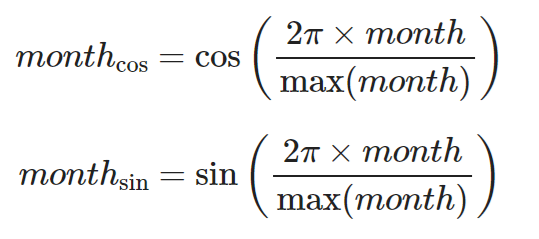

In [238]:
def month_to_int(df):
    months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    df['Month_Int'] = df['Month']
    
    for i, month in enumerate(months):
        df['Month_Int'] = df['Month_Int'].replace(month, i+1)
        
    return pd.to_numeric(df["Month_Int"], downcast="float")
    
preprossed_data_df['Month_Int'] = month_to_int(preprossed_data_df)

# Normalize x values to match with the 0-2π cycle
preprossed_data_df["Month_Norm"] = 2 * np.pi * preprossed_data_df["Month_Int"] / preprossed_data_df["Month_Int"].max()
# Cos and sin features
preprossed_data_df["Cos_Month"] = np.cos(preprossed_data_df["Month_Norm"])
preprossed_data_df["Sin_Month"] = np.sin(preprossed_data_df["Month_Norm"])
# preprossed_data_df["CONFIRM"] = preprossed_data_df["Cos_Month"]**2 + preprossed_data_df["Sin_Month"]**2 # SHOULD BE ONE

# Plotting months in a cyclical enocding
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(y=preprossed_data_df.Cos_Month, x=preprossed_data_df.Sin_Month, mode="markers"))

fig.update_layout(yaxis = dict(title="Cos_Month"),
                  xaxis = dict(title="Sin_Month", scaleanchor = "x", scaleratio = 1))
fig.show()

As it is shown, the two new features for the month allign on the cyrcle

In [239]:
display(preprossed_data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       6236 non-null   float64
 1   Ratings       6236 non-null   int64  
 2   Genre         6236 non-null   object 
 3   BookCategory  6236 non-null   object 
 4   Price         5699 non-null   float64
 5   Set           6236 non-null   object 
 6   Unnamed: 0    537 non-null    float64
 7   Authors       6236 non-null   object 
 8   No. Authors   6236 non-null   int64  
 9   Print         6236 non-null   object 
 10  Type          6236 non-null   object 
 11  Month         6236 non-null   object 
 12  Year          6236 non-null   object 
 13  Topic 0       6236 non-null   float64
 14  Topic 1       6236 non-null   float64
 15  Topic 2       6236 non-null   float64
 16  Topic 3       6236 non-null   float64
 17  Topic 4       6236 non-null   float64
 18  Topic 5       6236 non-null 

None

Move target variable to the end

In [240]:
preprossed_data_df = preprossed_data_df[[c for c in preprossed_data_df if c not in ['Price']] 
                  + ['Price']]

In [241]:
finalized_data_df =  preprossed_data_df.drop(['Month', 'Month_Int', 'Month_Norm'], axis=1)
visualization_data_df =  preprossed_data_df.drop(['Month_Int', 'Month_Norm'], axis=1)

# Visualization

In [242]:
visualization_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       6236 non-null   float64
 1   Ratings       6236 non-null   int64  
 2   Genre         6236 non-null   object 
 3   BookCategory  6236 non-null   object 
 4   Set           6236 non-null   object 
 5   Unnamed: 0    537 non-null    float64
 6   Authors       6236 non-null   object 
 7   No. Authors   6236 non-null   int64  
 8   Print         6236 non-null   object 
 9   Type          6236 non-null   object 
 10  Month         6236 non-null   object 
 11  Year          6236 non-null   object 
 12  Topic 0       6236 non-null   float64
 13  Topic 1       6236 non-null   float64
 14  Topic 2       6236 non-null   float64
 15  Topic 3       6236 non-null   float64
 16  Topic 4       6236 non-null   float64
 17  Topic 5       6236 non-null   float64
 18  Topic 6       6236 non-null 

In [243]:
visualization_data_df['Year'] = visualization_data_df['Year'].astype(float)

### Histograms/Barplots for numerical features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use is

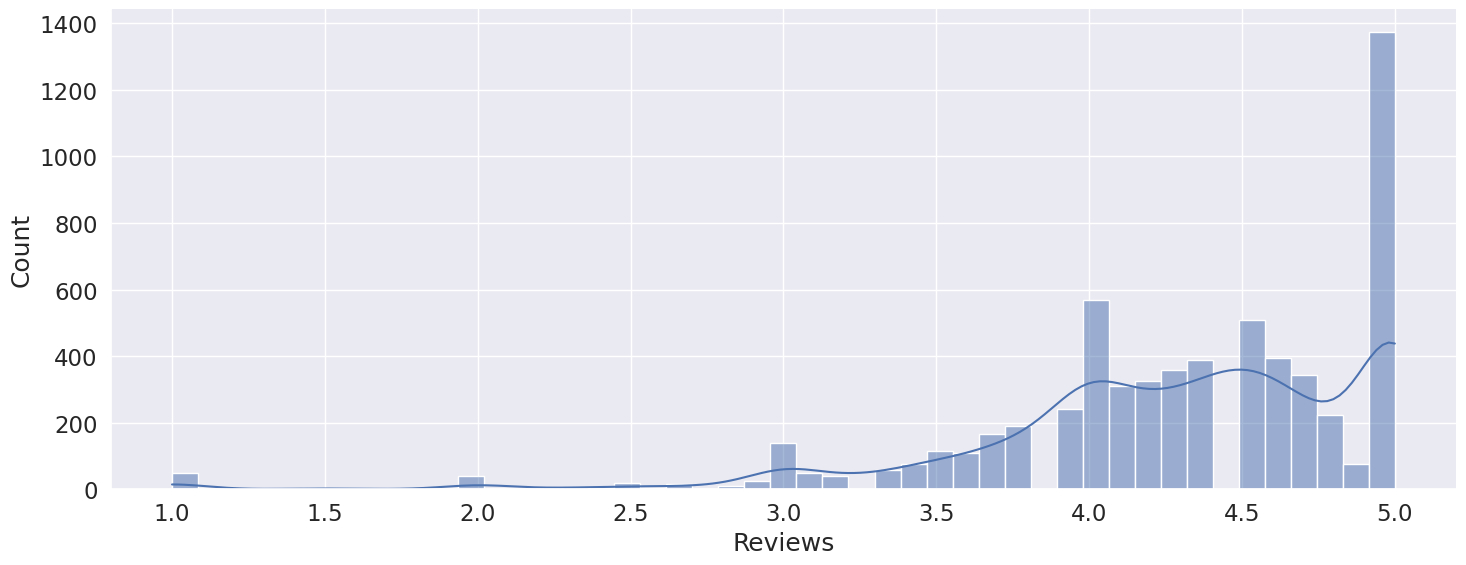

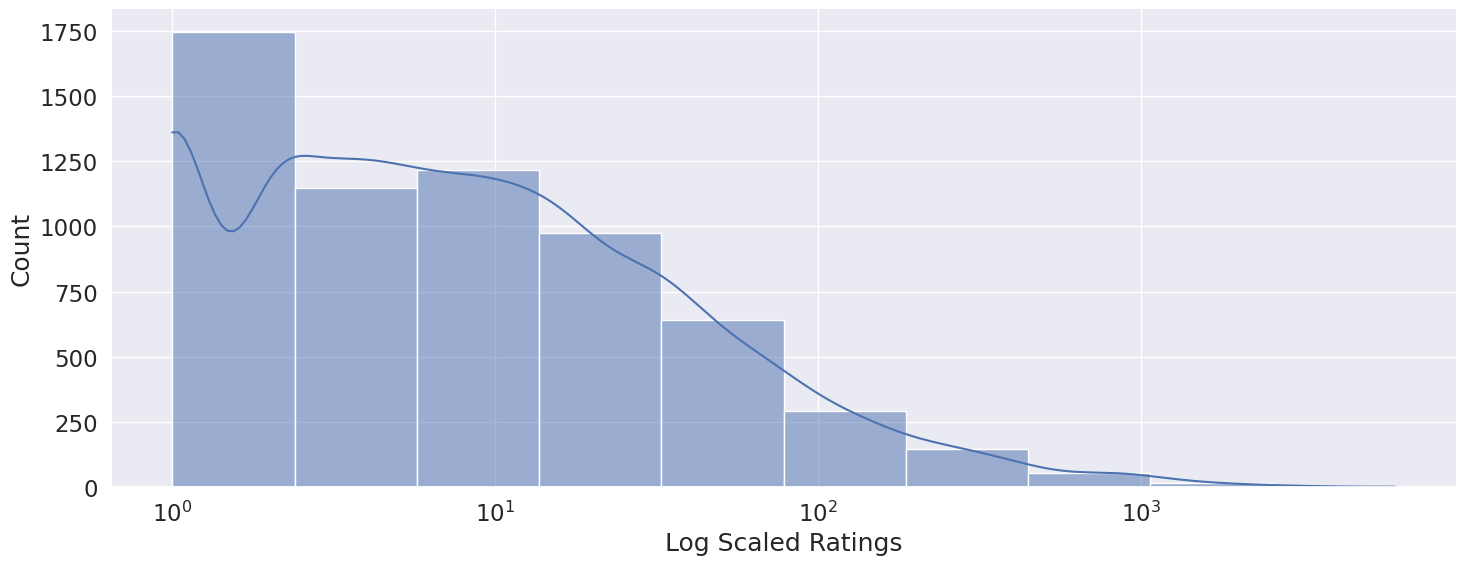

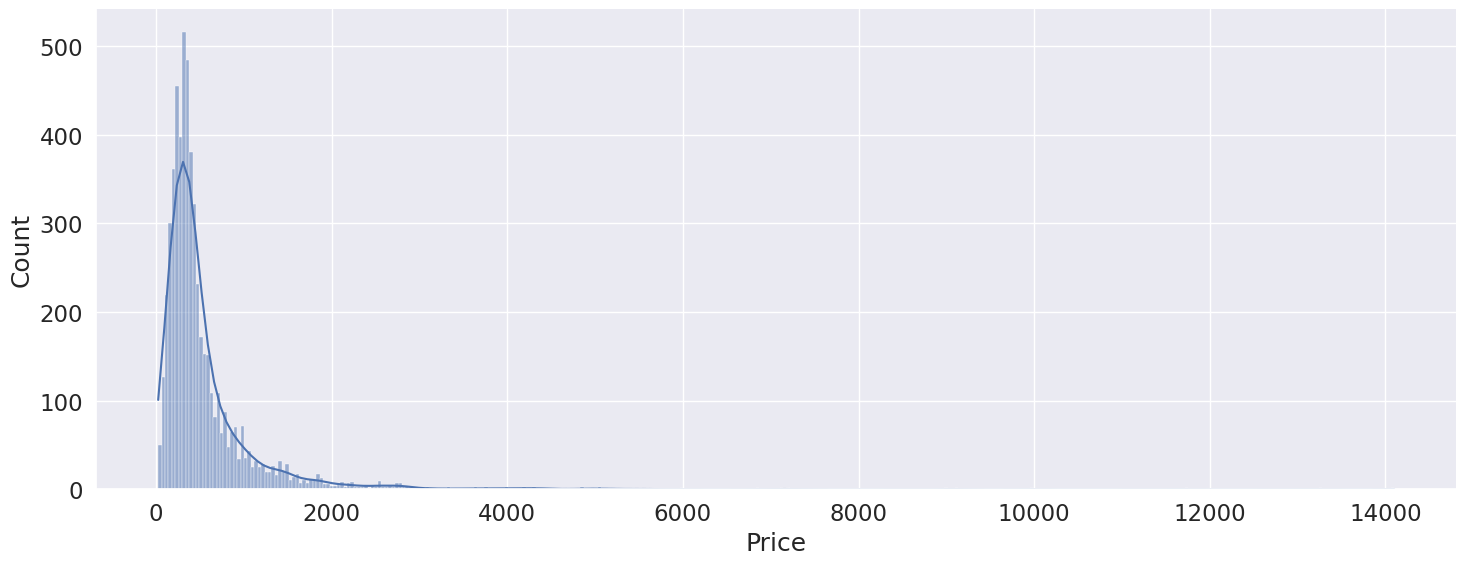

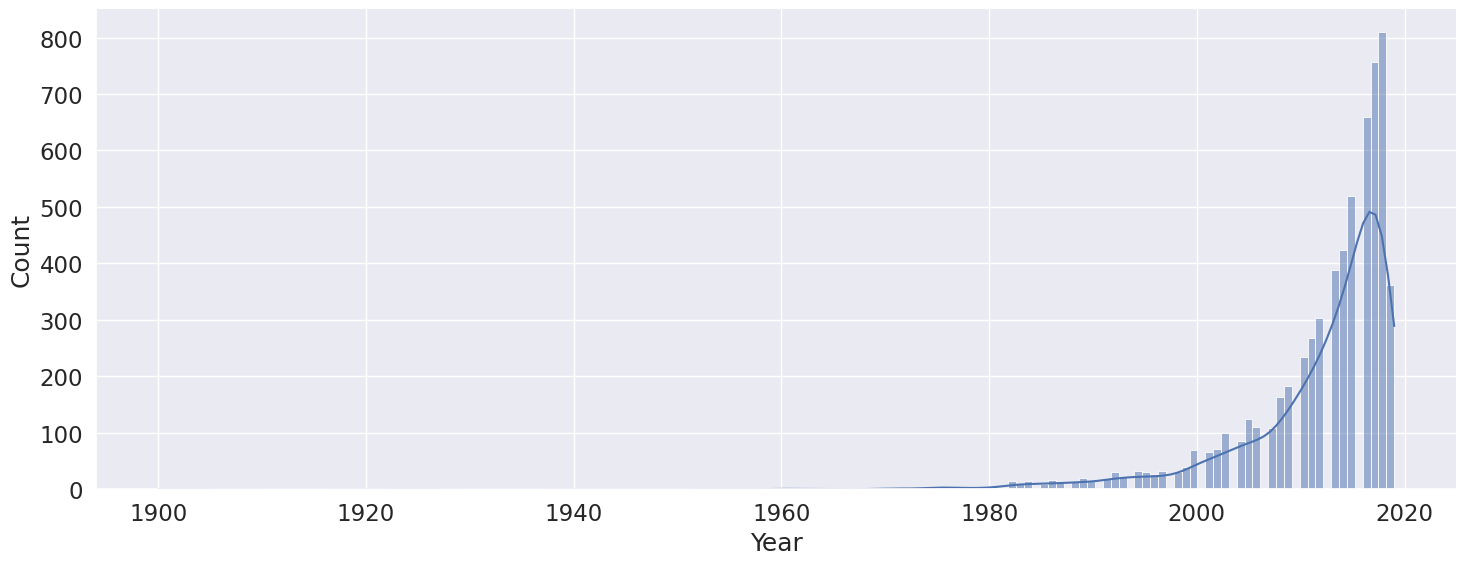

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



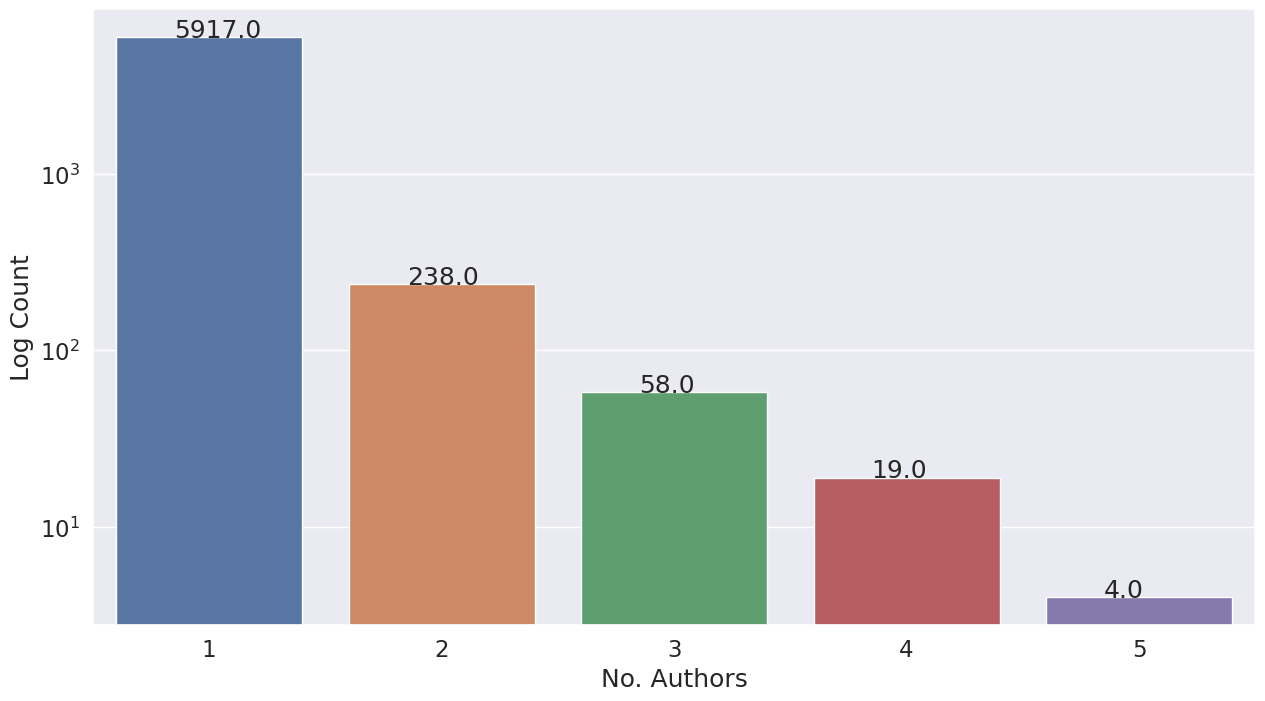

In [244]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(font_scale=1.5)

# Histograms
sns.displot(data=visualization_data_df, x="Reviews", kde=True, height=6,aspect=2.5)
ax=sns.displot(data=visualization_data_df, x="Ratings", bins=10, kde=True, log_scale=True,height=6,aspect=2.5)
ax.set(xlabel='Log Scaled Ratings', ylabel='Count')
sns.displot(data=visualization_data_df, x="Price", kde=True,height=6,aspect=2.5) #chi-squared distribution
sns.displot(data=visualization_data_df, x="Year", kde=True,height=6,aspect=2.5)

plt.show()
# Barplot No. Authors counts
ax = sns.countplot(data=visualization_data_df, x="No. Authors")
ax.set_yscale("log")
ax.set(ylabel='Log Count')

for p in ax.patches:
   ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

### Boxplot for numerical features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



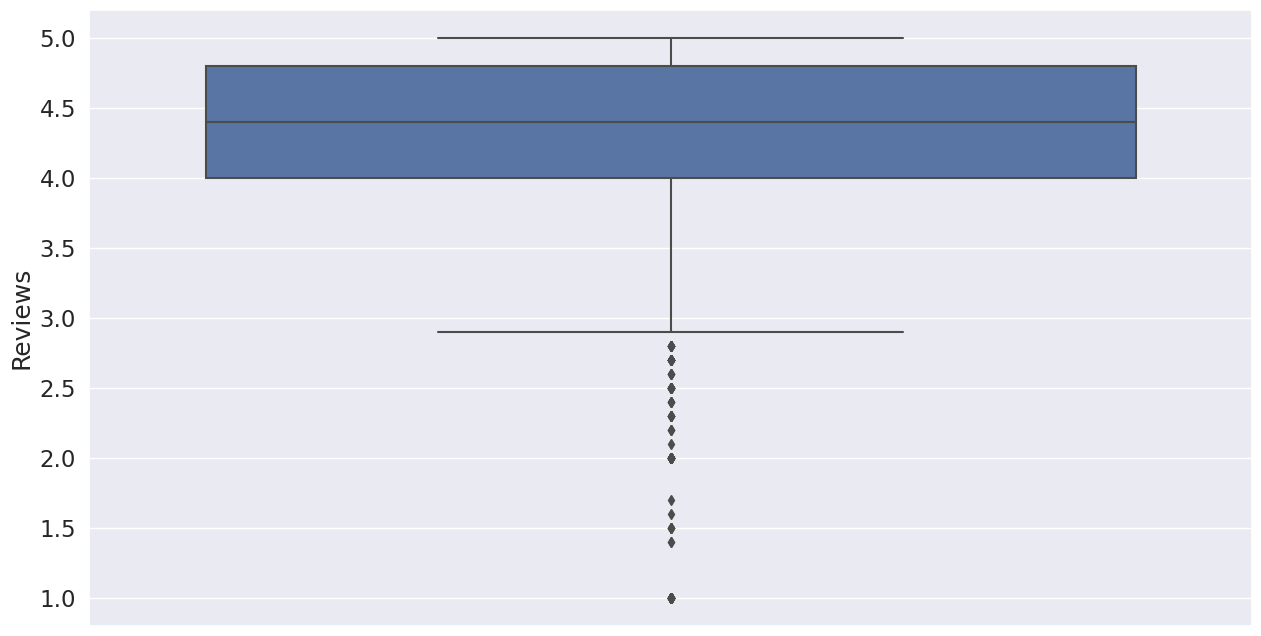

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



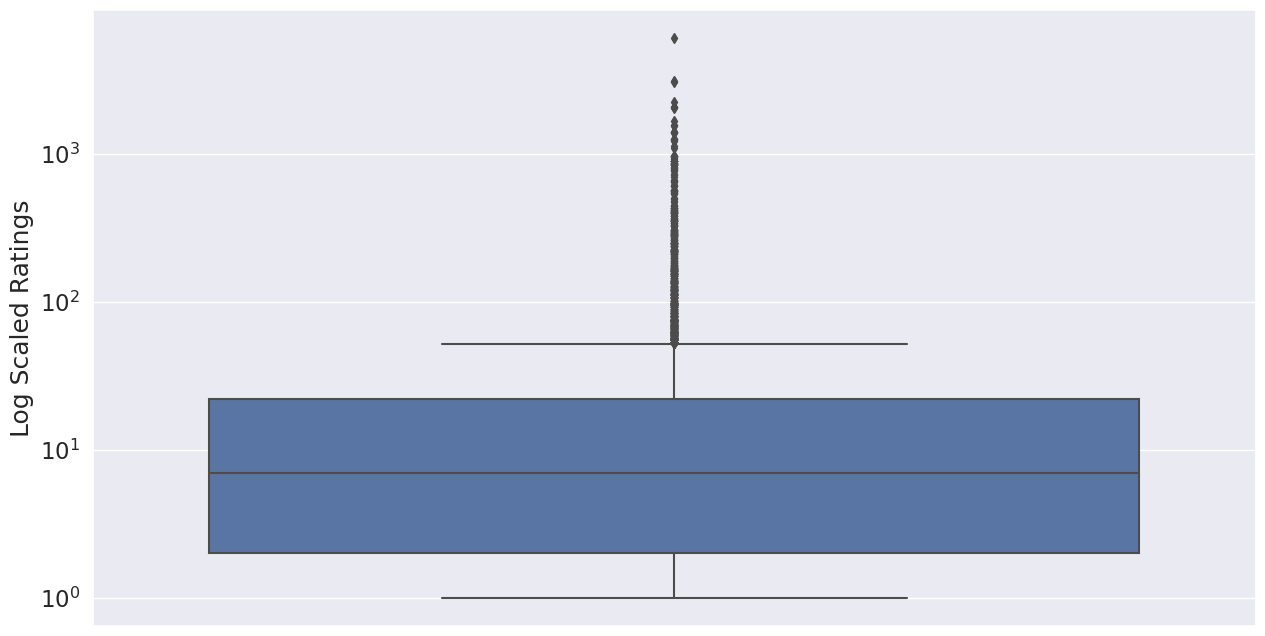

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



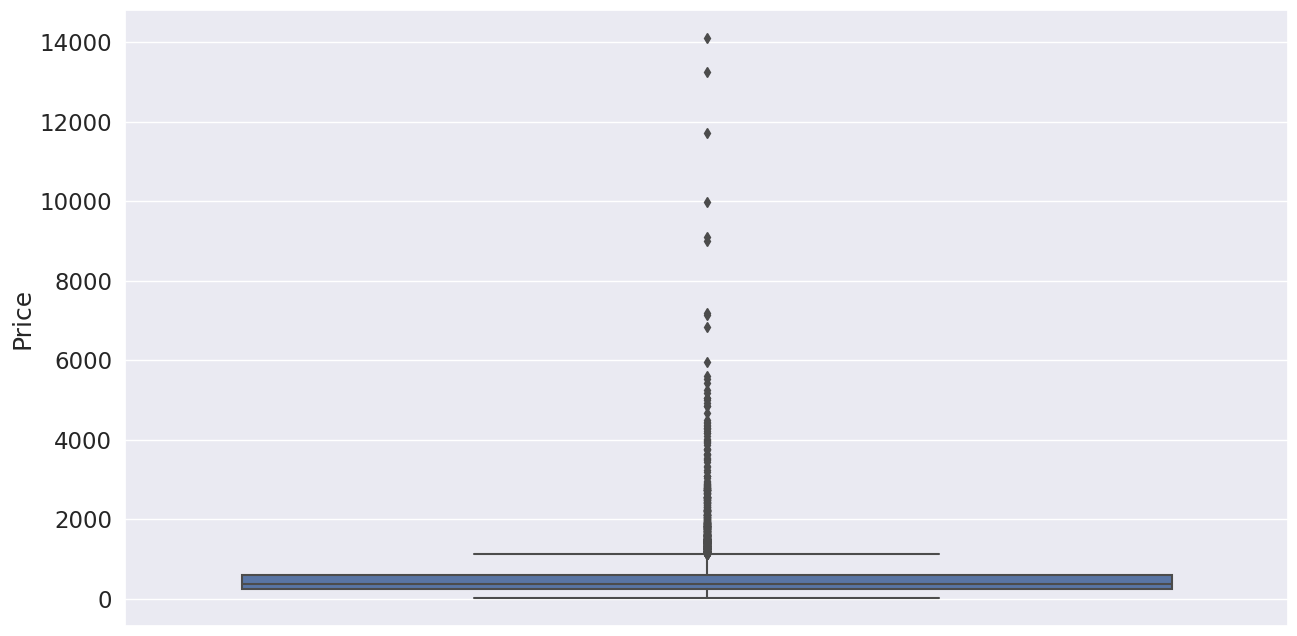

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



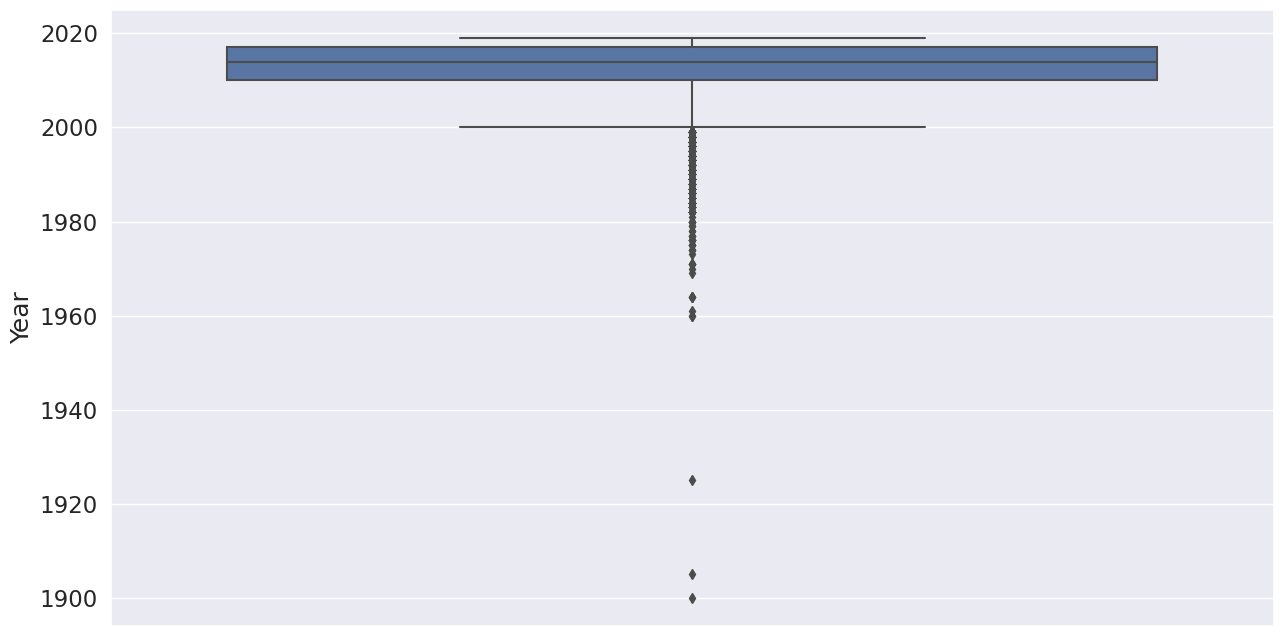

In [245]:
g=sns.boxplot(data=visualization_data_df, y='Reviews')
plt.show()
g=sns.boxplot(data=visualization_data_df, y='Ratings')
g.set(yscale='log')
g.set(ylabel='Log Scaled Ratings')
plt.show()
g=sns.boxplot(data=visualization_data_df, y='Price')
plt.show()
g=sns.boxplot(data=visualization_data_df, y='Year')
plt.show()

### Boxplot between Price and Month

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



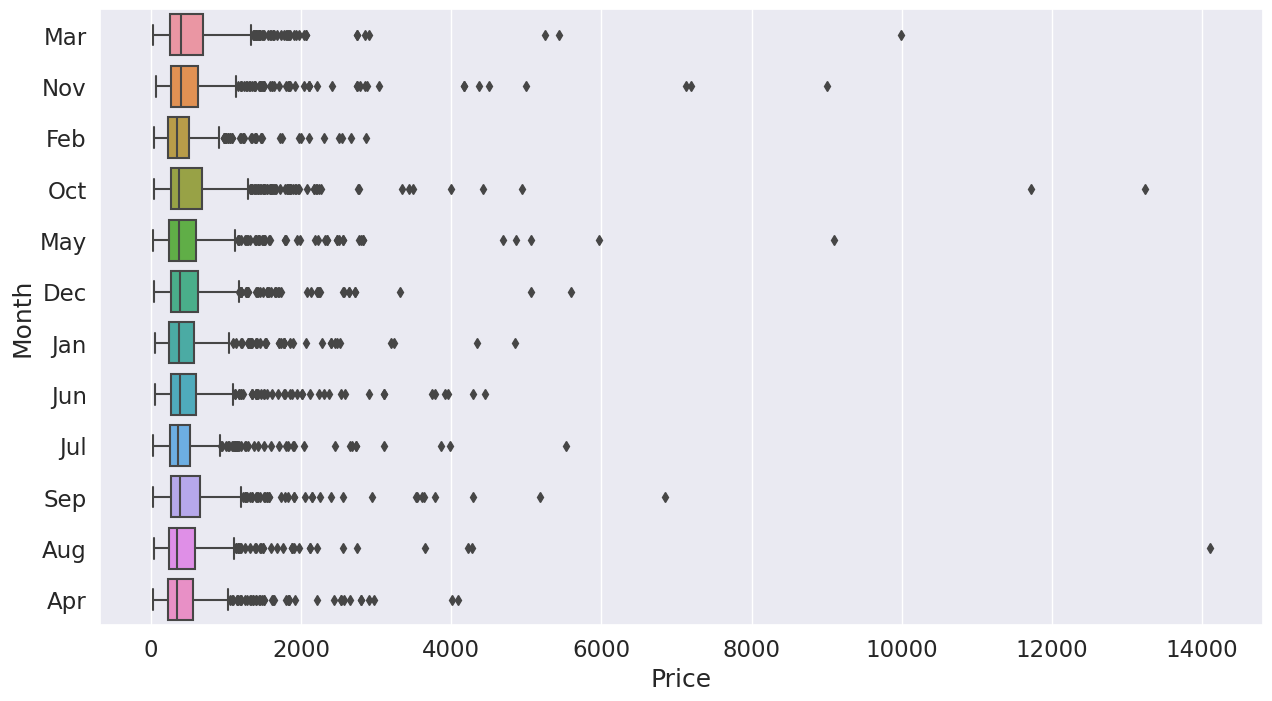

In [246]:
g=sns.boxplot(data=visualization_data_df,x="Price",y='Month')
plt.show()

### create pairs plot for all numeric variables

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance

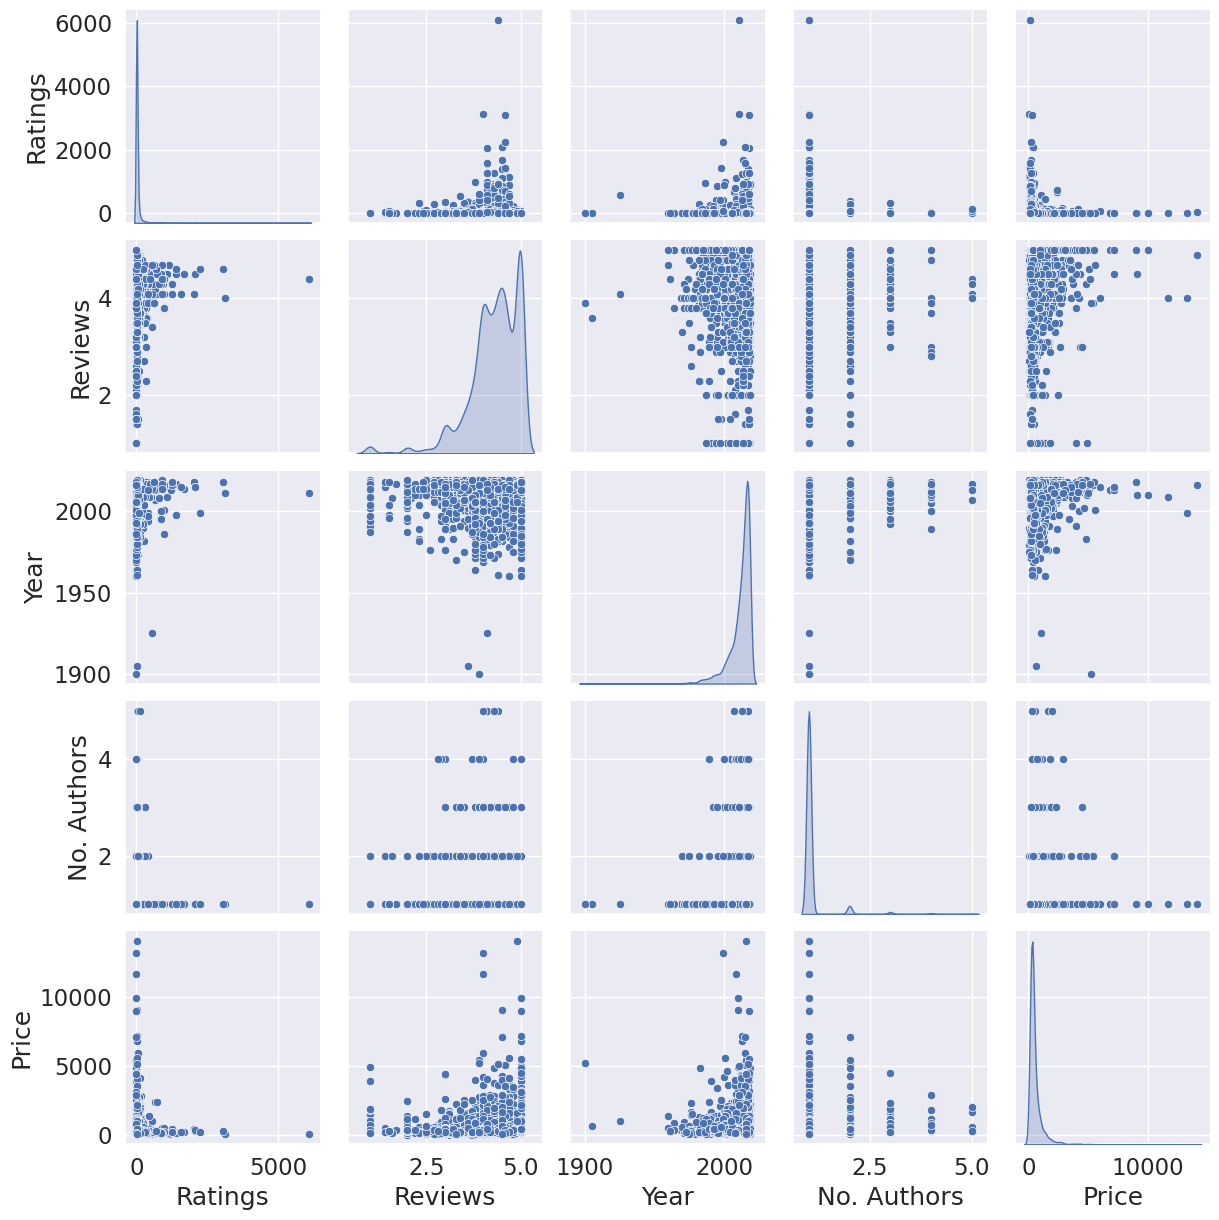

In [247]:
numerical_df= visualization_data_df[['Ratings', 'Reviews','Year','No. Authors','Price']]
sns.pairplot(numerical_df, diag_kind= 'kde')

### Correlation matrix

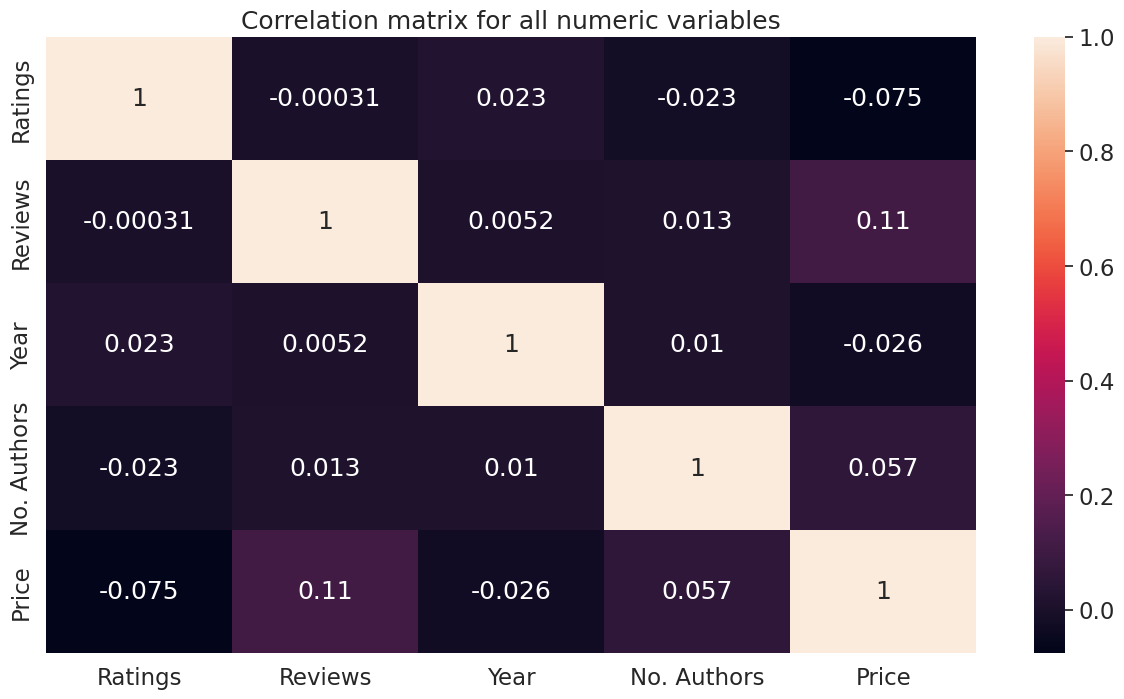

In [248]:
hm=sns.heatmap(data=numerical_df.corr(),annot = True)
hm.set( title = "Correlation matrix for all numeric variables")
sns.set(rc={'figure.figsize':(15, 8)})
sns.set(font_scale=1.5)

plt.show()


The provided comment suggests that when dealing with more complex datasets in Seaborn, where there are multiple measurements for the same value of the x variable, Seaborn's default behavior is to aggregate these multiple measurements at each x value. This is achieved by plotting the mean and the 95% confidence interval around the mean. This default behavior provides a summary representation of the central tendency and the variability of the data at each x value.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



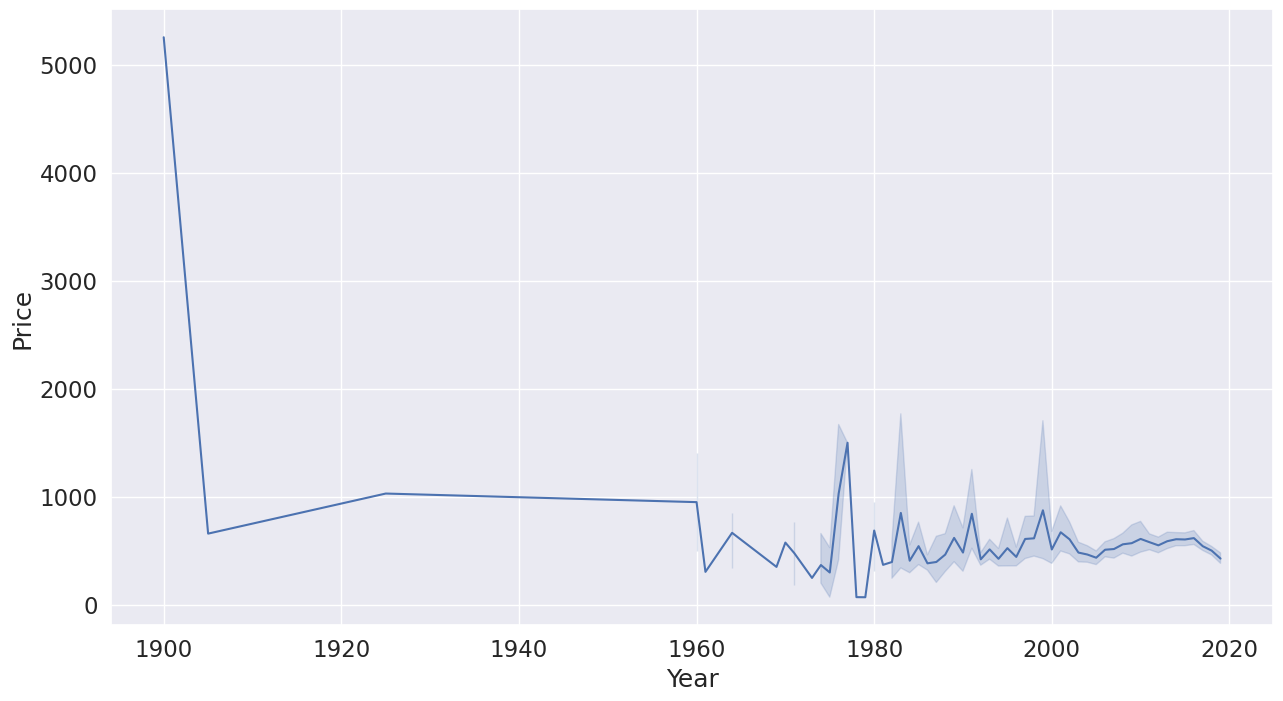

In [249]:
sns.lineplot(data=visualization_data_df, x = "Year" , y ="Price")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



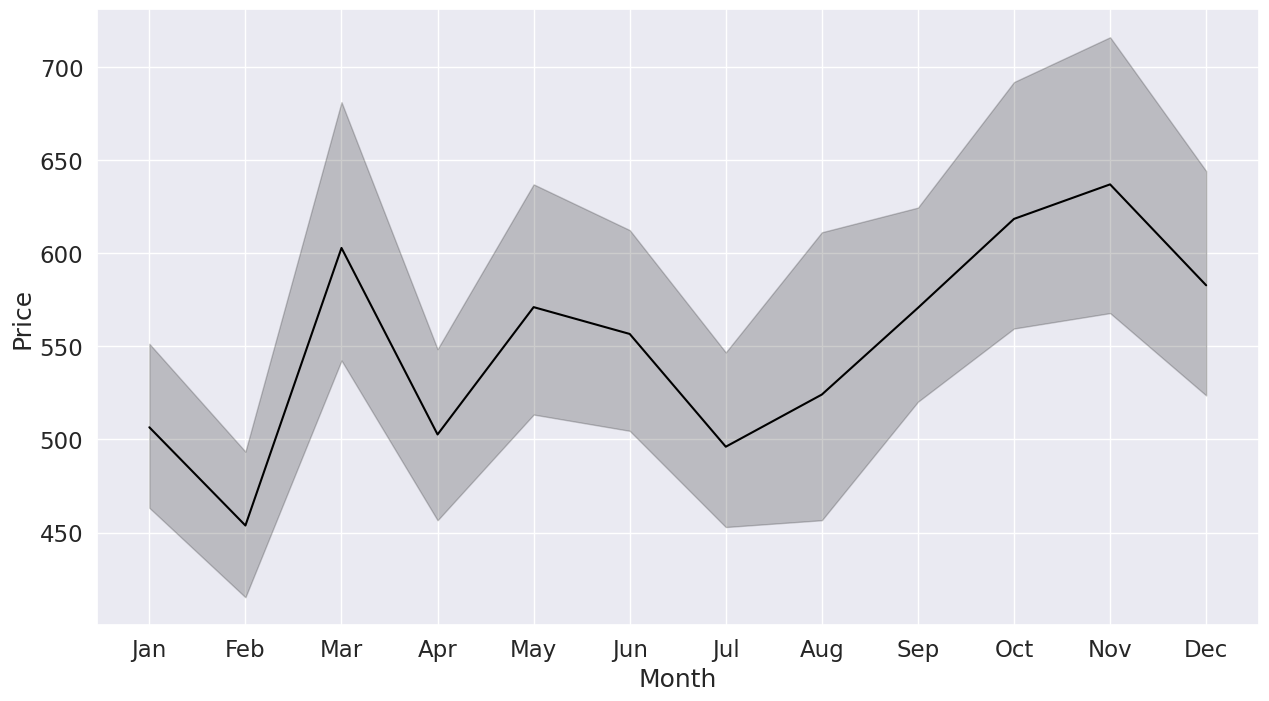

In [250]:
months = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
visualization_data_df['Month'] = pd.Categorical(visualization_data_df['Month'], ordered=True, categories = months)
sns.lineplot(x="Month",y="Price",data = visualization_data_df,color="BLACK")
plt.show()

The comment suggests an alternative approach, particularly suitable for larger datasets. Instead of representing the spread of the distribution at each timepoint with a confidence interval, the recommendation is to plot the standard deviation. This alternative provides a visual depiction of the variability or dispersion of the data points at each timepoint, offering a different perspective on the dataset's distribution characteristics.

/tmp/ipykernel_47/1833265921.py:1: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



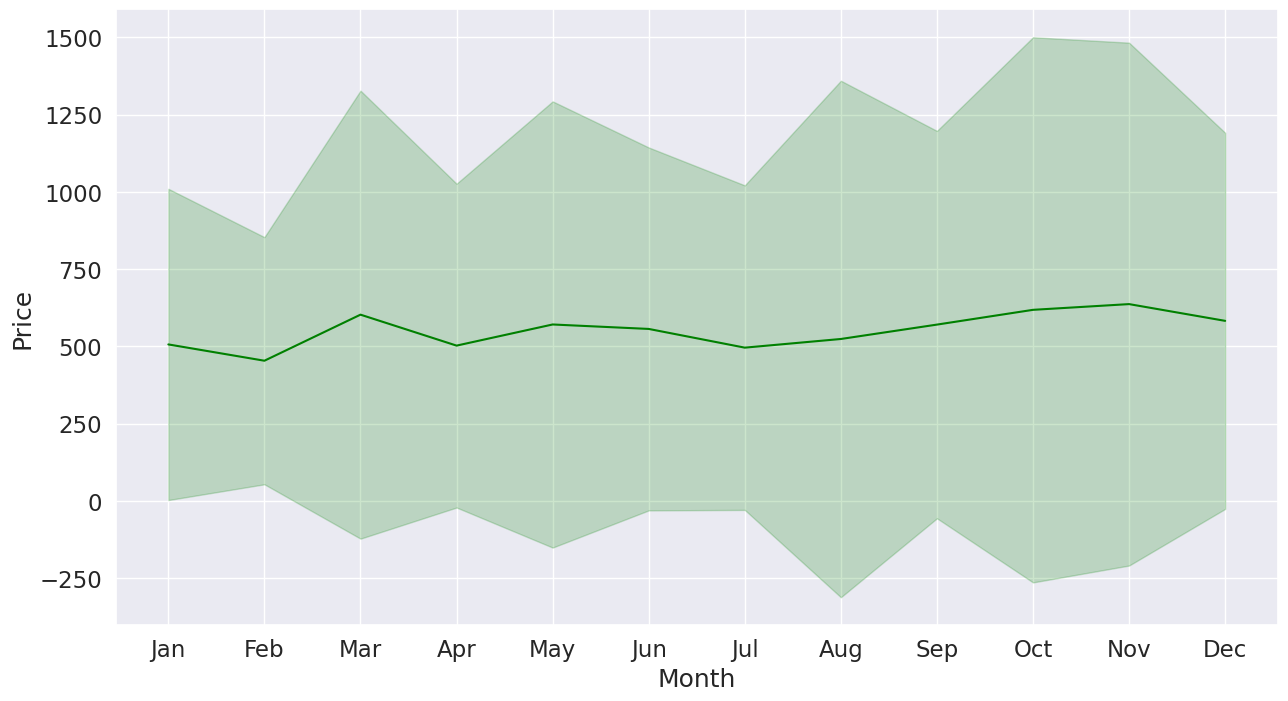

In [251]:
sns.lineplot(x="Month", y="Price", ci="sd", data=visualization_data_df,color="GREEN");
plt.show()

### Barplots between Price and Categorical Features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



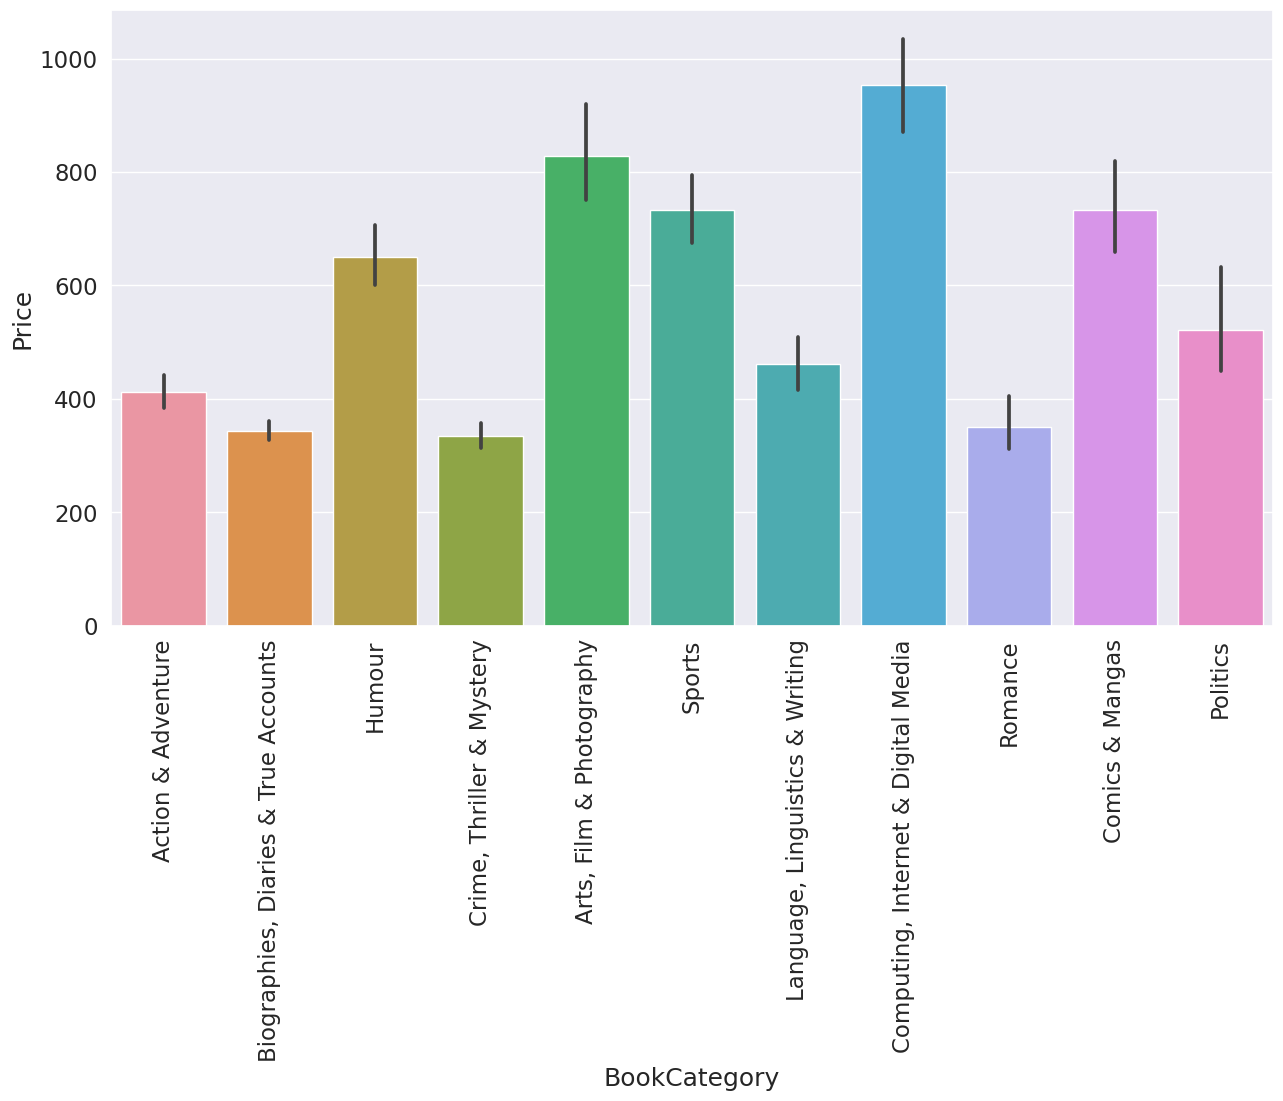

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice



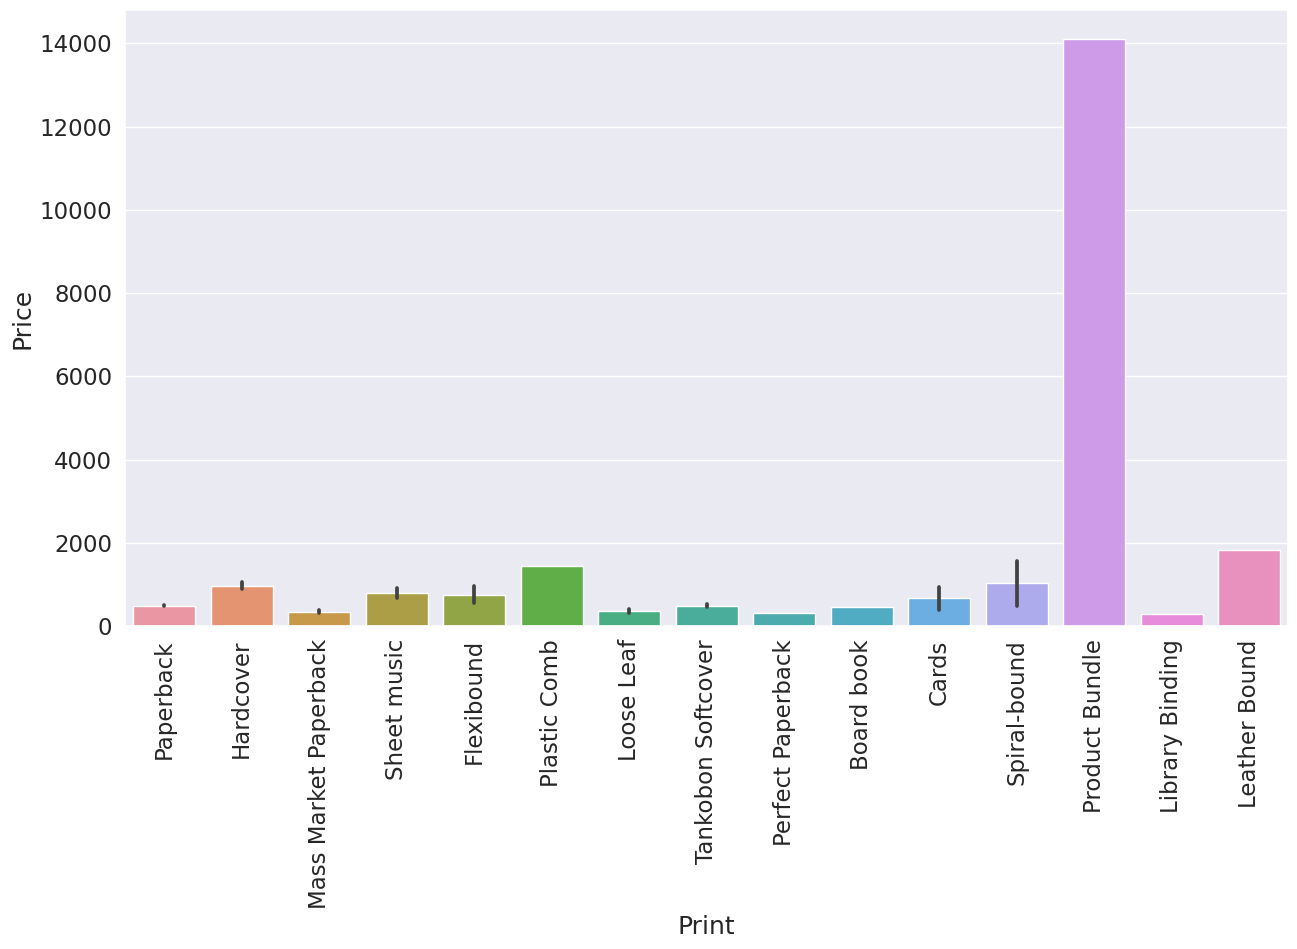

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/algorithms.py:98: RuntimeWarning:

Mean of empty slice



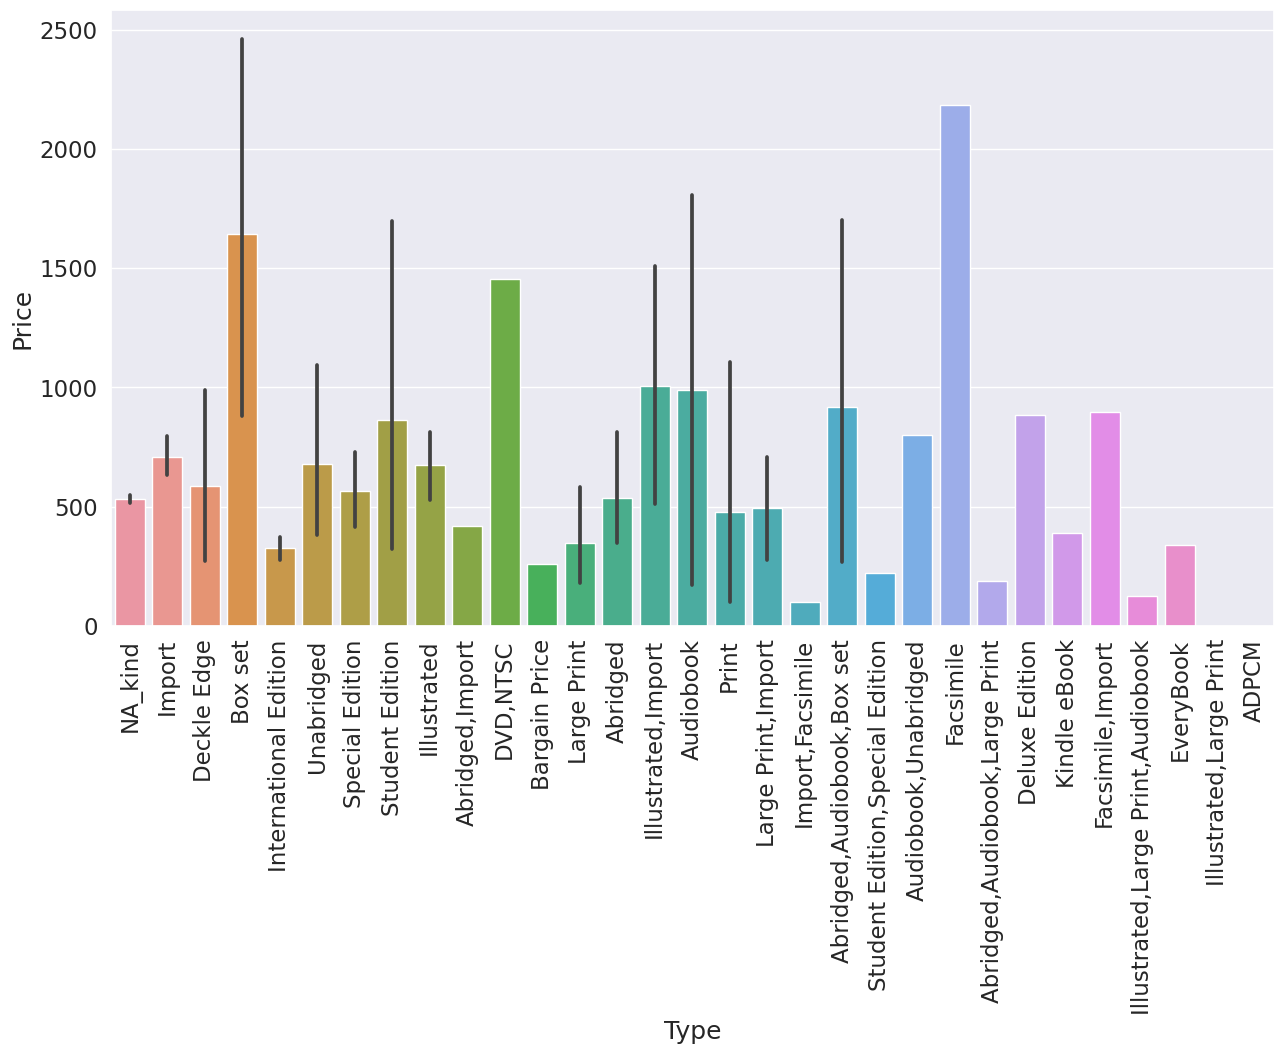

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



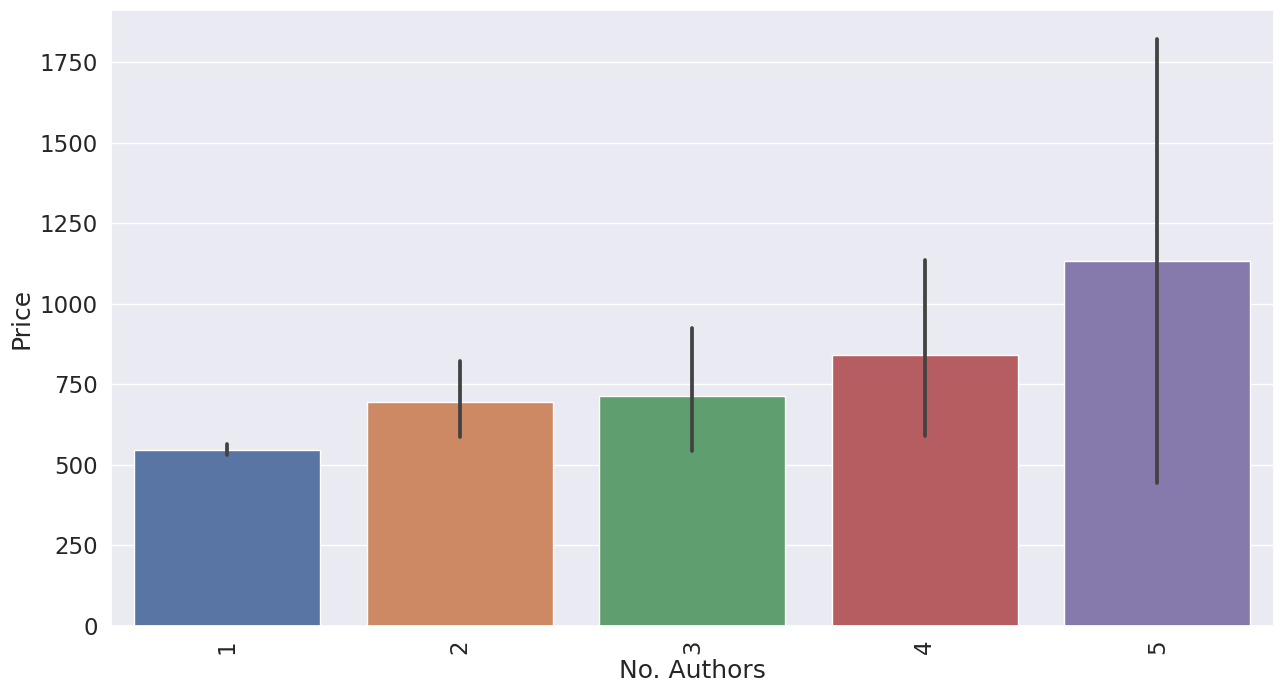

In [252]:
sns.barplot(data=visualization_data_df, x="BookCategory",y='Price')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data=visualization_data_df, x="Print",y='Price')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data=visualization_data_df, x="Type",y='Price')
plt.xticks(rotation=90)
plt.show()
sns.barplot(data=visualization_data_df, x="No. Authors", y='Price')
plt.xticks(rotation=90)
plt.show()

# Prediction

In [253]:
random_state = 420
np.random.seed(random_state) 

In [254]:
data_df = finalized_data_df
display(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Reviews       6236 non-null   float64
 1   Ratings       6236 non-null   int64  
 2   Genre         6236 non-null   object 
 3   BookCategory  6236 non-null   object 
 4   Set           6236 non-null   object 
 5   Unnamed: 0    537 non-null    float64
 6   Authors       6236 non-null   object 
 7   No. Authors   6236 non-null   int64  
 8   Print         6236 non-null   object 
 9   Type          6236 non-null   object 
 10  Year          6236 non-null   object 
 11  Topic 0       6236 non-null   float64
 12  Topic 1       6236 non-null   float64
 13  Topic 2       6236 non-null   float64
 14  Topic 3       6236 non-null   float64
 15  Topic 4       6236 non-null   float64
 16  Topic 5       6236 non-null   float64
 17  Topic 6       6236 non-null   float64
 18  Topic 7       6236 non-null 

None

### Feature engineering for the categorical variables

In the initial preprocessing step, the decision was made to exclude categories from all categorical variables that have a low frequency of occurrence in the dataset. Specifically, a threshold of 0.2% was set, ensuring the removal of categories with minimal representation.

In [255]:
T = 0.2 * 1/100

In [256]:
def multi_label_binarize_feature(feature_series):
    df_feature = pd.DataFrame(feature_series, columns=['initial_feature'])
    mlb = MultiLabelBinarizer()
    _X = mlb.fit_transform(df_feature.initial_feature)
    df_one_hot_feature = pd.DataFrame(_X, columns=mlb.classes_)
    return df_one_hot_feature

def handle_features(df_one_hot, other_label, keep_rare=True, frq_drop_threshold=T):
    # Sort values based on their frequencies
    df_values = df_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
    
    # Plots the top 70 frequencies of the different categories
    sns.set(rc={'figure.figsize':(15.7,8.27)})
    ax = sns.barplot(x=df_values.index[0:70], y=df_values.values[0:70])
    for p in ax.patches:
       ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01), rotation=90)
    plt.xticks(rotation=90)
    plt.show()
    
    # Mark the columns/categorise which will be dropped based on 
    # the given frequency thershold frq_drop_threshold
    drop_list = []
    for category, value in df_values.items():
        if value < frq_drop_threshold * len(df_one_hot):
            drop_list.append(category)

    # Drop the marked columns/categories and 
    # replace with a new "other" category
    if keep_rare == True:
        df_one_hot[other_label] = 0
    for category in drop_list:
        if keep_rare == True:
            df_one_hot[other_label] = df_one_hot[other_label] + df_one_hot[category]
        df_one_hot = df_one_hot.drop([category], axis=1)
    # Since its a one-hot (yes/no) representation we keep only 
    if keep_rare == True:
        df_one_hot.loc[df_one_hot[other_label] > 0, other_label] = 1
    return df_one_hot

### Encoding of Type

,ADPCM,Abridged,Audiobook,Bargain Price,Box set,DVD,Deckle Edge,Deluxe Edition,EveryBook,Facsimile,...,Import,International Edition,Kindle eBook,Large Print,NA_kind,NTSC,Print,Special Edition,Student Edition,Unabridged
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


Category-kind frequencies: 


NA_kind                  5451
Import                    624
Illustrated                53
Special Edition            19
Unabridged                 19
Box set                    16
Abridged                   15
Student Edition            14
Large Print                11
Audiobook                  11
International Edition      10
Deckle Edge                 7
Facsimile                   4
Print                       3
DVD                         1
Deluxe Edition              1
EveryBook                   1
Kindle eBook                1
Bargain Price               1
NTSC                        1
ADPCM                       1
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



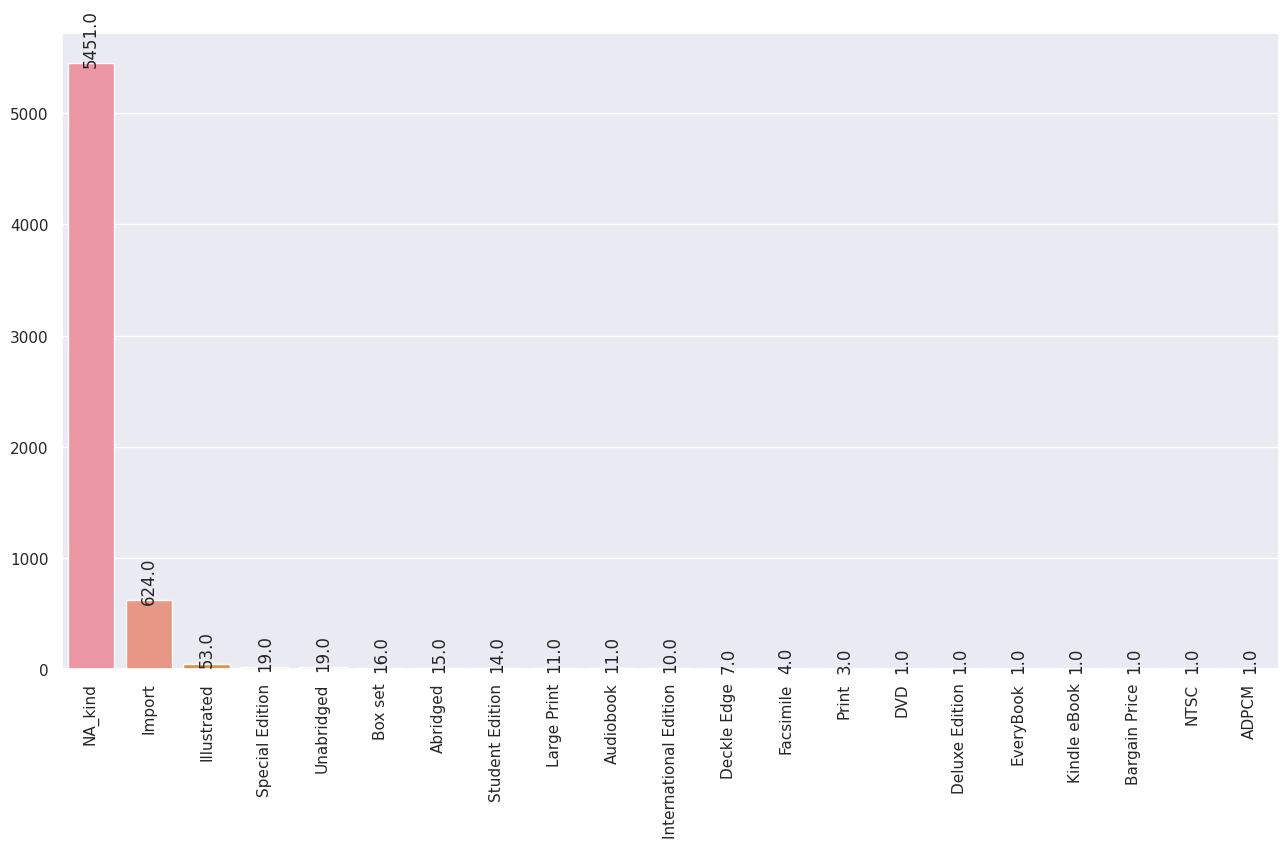

Category-kind frequencies after removing the non-frequent: 


Import             624
Illustrated         53
Rare_Kind           50
Special Edition     19
Unabridged          19
Box set             16
Abridged            15
Student Edition     14
dtype: int64

In [257]:
# Taking a series of lists for the different kinds, since books have multiple kinds
kind_series = pd.Series([kind.split(",") for kind in data_df['Type']])
# Encoding with MultiLabelBinarizer, since one-hot only takes one value, but 
# in our case we have multiple kinds for a book
df_kind_one_hot = multi_label_binarize_feature(kind_series)
# Showing results
display(df_kind_one_hot)

# Showing the frequency of categories before removing non-important
df_values = df_kind_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-kind frequencies: ")
display(df_values)

# Dropping the rare kinds, and marking them as rare
df_kind_one_hot = handle_features(df_kind_one_hot, other_label="Rare_Kind")

# Dropping the column which shows that the book has no kind since it will be the base (all zero representation)
# Basically, n-1 of the n categories are used, similarly to the dummy encoding
df_kind_one_hot = df_kind_one_hot.drop(['NA_kind'], axis=1)

# Showing the frequency of categories after removing non-important
df_values = df_kind_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-kind frequencies after removing the non-frequent: ")
display(df_values)

### Encoding of Author

,anthony j gaston,conditioning association nsca,kakar,owen king,stuart redmanidea,0,2,3dtotal publishing,3dtotal team,a b de villiers,...,zarrilli phillip b,zeena dhalla,zhisui li,zia mody,ziauddin sardar,ziauddin yousafzai,zlatan ibrahimovic,zorba laloo,zvi kohavi,zygmunt miloszewski
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Category-author frequencies: 


agatha christie        69
dk                     51
ladybird               50
albert uderzo          44
herge                  34
                       ..
j p dalvi               1
j p delaney             1
j s bach                1
jacek m zurada          1
zygmunt miloszewski     1
Length: 3957, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



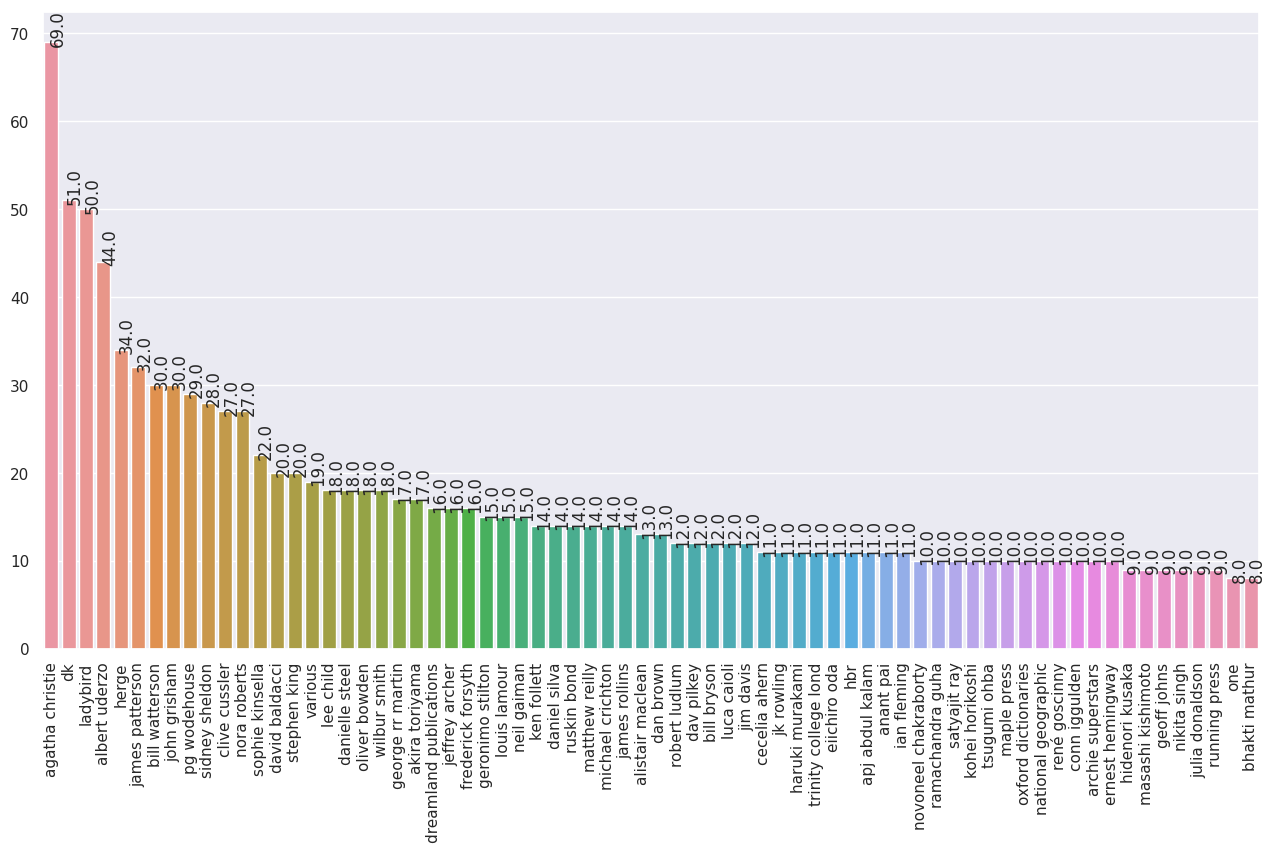

Category-author frequencies after removing the non-frequent: 


Rare_Author               5410
agatha christie             69
dk                          51
ladybird                    50
albert uderzo               44
herge                       34
james patterson             32
john grisham                30
bill watterson              30
pg wodehouse                29
sidney sheldon              28
clive cussler               27
nora roberts                27
sophie kinsella             22
stephen king                20
david baldacci              20
various                     19
danielle steel              18
wilbur smith                18
oliver bowden               18
lee child                   18
akira toriyama              17
george rr martin            17
frederick forsyth           16
dreamland publications      16
jeffrey archer              16
louis lamour                15
neil gaiman                 15
geronimo stilton            15
ken follett                 14
matthew reilly              14
michael crichton            14
james ro

In [258]:
# Taking a series of lists for the different authors, 
# since there are books which have multiple authors
authors_series = pd.Series([author.split(", ") for author in data_df['Authors']])# Encoding with MultiLabelBinarizer, since one-hot only takes one value, but 
# in our case we have multiple authors for a book
df_authors_one_hot = multi_label_binarize_feature(authors_series)
# Showing results
display(df_authors_one_hot)

# Showing the frequency of categories before removing non-important
df_values = df_authors_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-author frequencies: ")
display(df_values)

# Dropping the rare authors, and marking them as rare
df_authors_one_hot = handle_features(df_authors_one_hot, other_label="Rare_Author")

# Dropping the column which shows that the book has no author since it will be the base (all zero representation)
# Basically, n-1 of the n categories are used, similarly to the dummy encoding
#df_authors_one_hot = df_authors_one_hot.drop(['NA_kind'], axis=1)

# Showing the frequency of categories after removing non-important
df_values = df_authors_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-author frequencies after removing the non-frequent: ")
display(df_values)

### Categories variables (one-hot encoding)

In [259]:
def apply_one_hot(df):
    encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
    _enoded_data = encoder.fit_transform(df).toarray()
    df_one_hot_feature = pd.DataFrame(data=_enoded_data, 
                                      columns=encoder.get_feature_names_out(df.columns))
    return df_one_hot_feature

### One-hot encoding Genre

Category-genre frequencies: 


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Genre_Action & Adventure (Books)               947
Genre_Romance (Books)                          419
Genre_Biographies & Autobiographies (Books)    373
Genre_Crime, Thriller & Mystery (Books)        276
Genre_Contemporary Fiction (Books)             256
                                              ... 
Genre_Essay, Letter & Review Writing             1
Genre_PGMEE Exam                                 1
Genre_PC & Video Games (Books)                   1
Genre_European History Textbooks                 1
Genre_Zoology                                    1
Length: 344, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



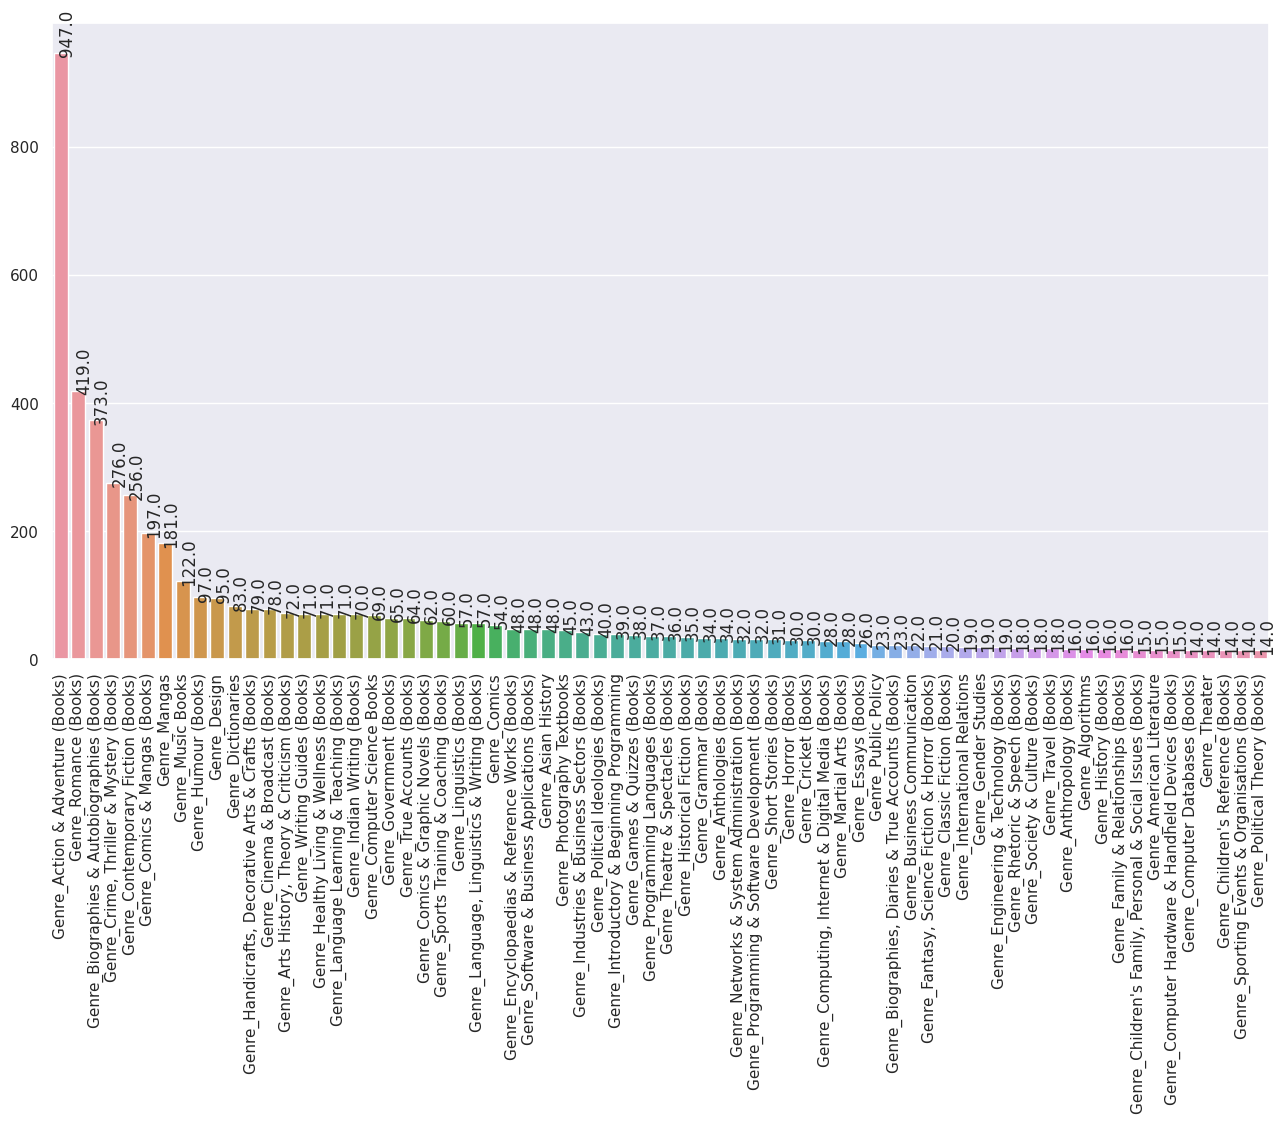

Category-genre frequencies after removing the non-frequent: 


Genre_Action & Adventure (Books)                                  947
Genre_Romance (Books)                                             419
Genre_Biographies & Autobiographies (Books)                       373
Genre_Crime, Thriller & Mystery (Books)                           276
Genre_Contemporary Fiction (Books)                                256
                                                                 ... 
Genre_Computer Databases (Books)                                   14
Genre_Journalism Books                                             13
Genre_Economics Textbooks                                          13
Genre_Children's Crafts, Hobbies & Practical Interests (Books)     13
Genre_Architecture (Books)                                         13
Length: 74, dtype: int64

In [260]:
df_genre_one_hot = apply_one_hot(data_df[['Genre']])

# Showing the frequency of categories before removing non-important
df_values = df_genre_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-genre frequencies: ")
display(df_values)

# Dropping the rare genres, and marking them as rare
df_genre_one_hot = handle_features(df_genre_one_hot, keep_rare=False, other_label="Rare_Genre")

# Showing the frequency of categories after removing non-important
df_values = df_genre_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-genre frequencies after removing the non-frequent: ")
display(df_values)

### One-hot encoding Book category

Category-BookCategory frequencies: 


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



BookCategory_Crime, Thriller & Mystery               723
BookCategory_Biographies, Diaries & True Accounts    596
BookCategory_Language, Linguistics & Writing         594
BookCategory_Comics & Mangas                         583
BookCategory_Romance                                 560
BookCategory_Humour                                  539
BookCategory_Arts, Film & Photography                517
BookCategory_Computing, Internet & Digital Media     510
BookCategory_Sports                                  471
BookCategory_Politics                                325
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



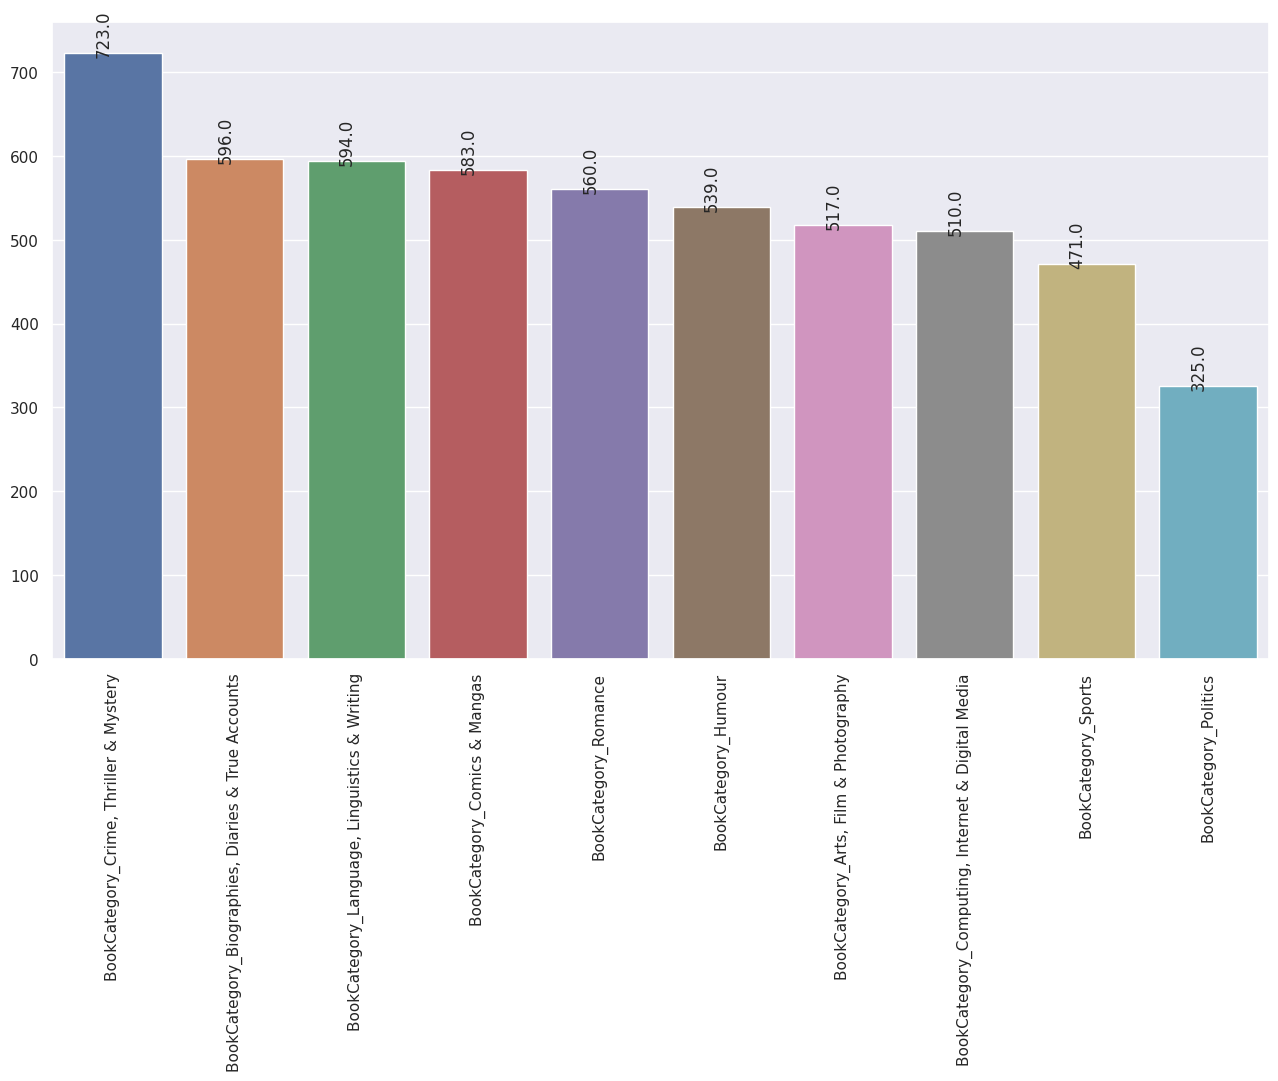

Category-BookCategory frequencies after removing the non-frequent: 


BookCategory_Crime, Thriller & Mystery               723
BookCategory_Biographies, Diaries & True Accounts    596
BookCategory_Language, Linguistics & Writing         594
BookCategory_Comics & Mangas                         583
BookCategory_Romance                                 560
BookCategory_Humour                                  539
BookCategory_Arts, Film & Photography                517
BookCategory_Computing, Internet & Digital Media     510
BookCategory_Sports                                  471
BookCategory_Politics                                325
dtype: int64

In [261]:
df_BookCategory_one_hot = apply_one_hot(data_df[['BookCategory']])

# Showing the frequency of categories before removing non-important
df_values = df_BookCategory_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-BookCategory frequencies: ")
display(df_values)

# Dropping the rare BookCategorys, and marking them as rare
df_BookCategory_one_hot = handle_features(df_BookCategory_one_hot, keep_rare=False, other_label="Rare_Genre")

# Showing the frequency of categories after removing non-important
df_values = df_BookCategory_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-BookCategory frequencies after removing the non-frequent: ")
display(df_values)

### One-hot encoding Print

Category-Print frequencies: 


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



Print_Paperback                5196
Print_Hardcover                 823
Print_Mass Market Paperback     155
Print_Sheet music                24
Print_Flexibound                 15
Print_Cards                       8
Print_Spiral-bound                4
Print_Tankobon Softcover          3
Print_Loose Leaf                  2
Print_Leather Bound               1
Print_Library Binding             1
Print_Perfect Paperback           1
Print_Plastic Comb                1
Print_Product Bundle              1
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



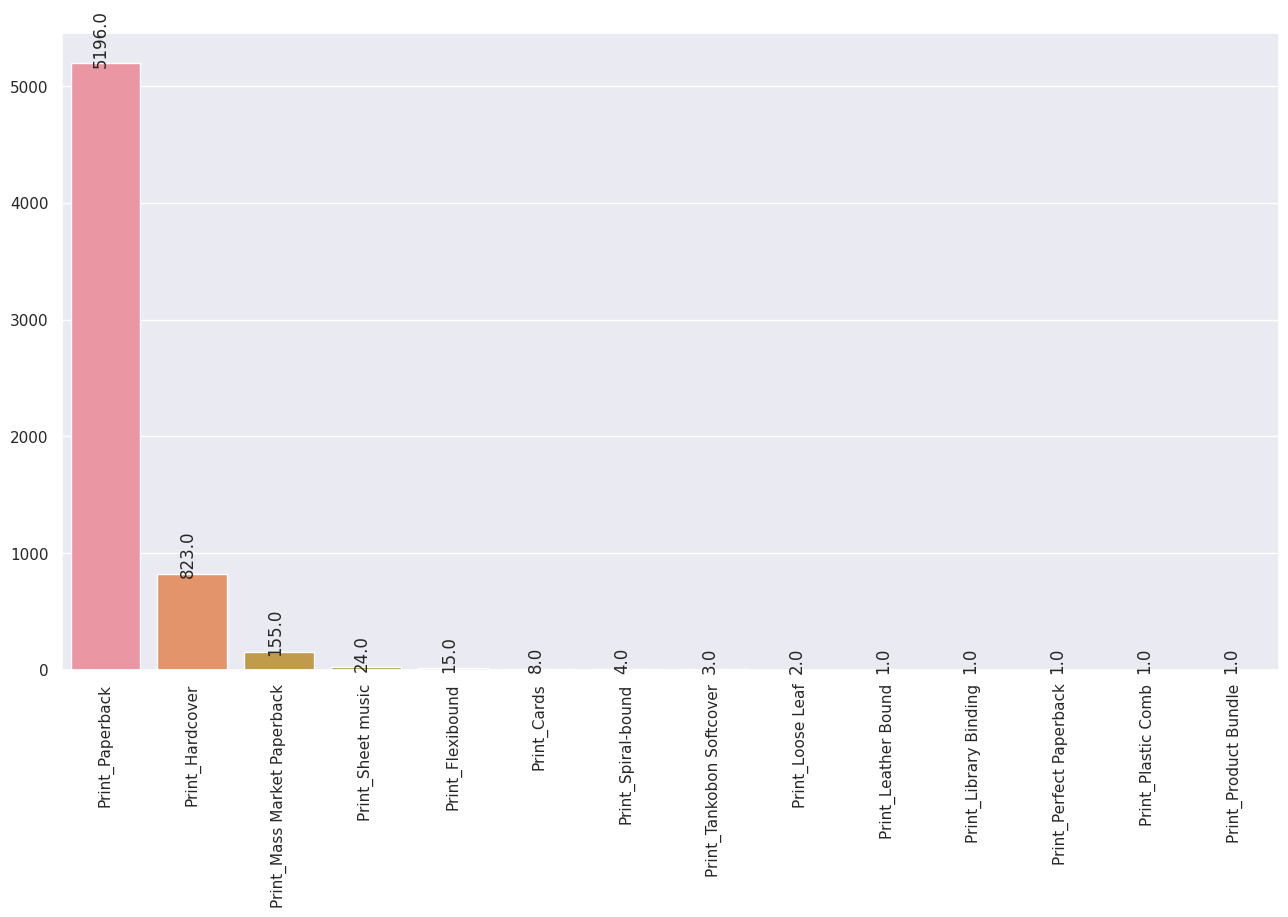

Category-Print frequencies after removing the non-frequent: 


Print_Paperback                5196
Print_Hardcover                 823
Print_Mass Market Paperback     155
Print_Sheet music                24
Print_Flexibound                 15
dtype: int64

In [262]:
df_Print_one_hot = apply_one_hot(data_df[['Print']])

# Showing the frequency of categories before removing non-important
df_values = df_Print_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-Print frequencies: ")
display(df_values)

# Dropping the rare Prints, and marking them as rare
df_Print_one_hot = handle_features(df_Print_one_hot, keep_rare=False, other_label="Rare_Genre")

# Showing the frequency of categories after removing non-important
df_values = df_Print_one_hot.astype(bool).sum(axis=0).sort_values(ascending=False)
print("Category-Print frequencies after removing the non-frequent: ")
display(df_values)

#### During this phase, the original categorical variables are eliminated, and new "one-hotted" columns are introduced into the dataframe.

In [263]:
final_data_df =  data_df.drop(['Genre', 'BookCategory', 'Authors', 'Print', 'Type'], axis=1)
final_data_df

,Reviews,Ratings,Set,Unnamed: 0,No. Authors,Year,Topic 0,Topic 1,Topic 2,Topic 3,...,Topic 18,Topic 19,Topic 20,Topic 21,Topic 22,Topic 23,Topic 24,Cos_Month,Sin_Month,Price
0,4.0,8,train,NaN,1,2016,0.005412,0.005412,0.005412,0.005412,...,0.005412,0.005412,0.005412,0.305332,0.005412,0.005412,0.005412,-4.371139e-08,1.000000e+00,220.00
1,3.9,14,train,NaN,1,2012,0.005262,0.005262,0.005262,0.005262,...,0.005262,0.005262,0.127374,0.234603,0.005262,0.005262,0.005262,8.660256e-01,-4.999998e-01,202.93
2,4.8,6,train,NaN,1,1982,0.003753,0.003753,0.003753,0.003753,...,0.003753,0.003753,0.003753,0.485618,0.003753,0.003753,0.003753,5.000000e-01,8.660254e-01,299.00
3,4.1,13,train,NaN,1,2017,0.006725,0.006725,0.006725,0.086879,...,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,0.006725,5.000003e-01,-8.660252e-01,180.00
4,5.0,1,train,NaN,1,2006,0.252130,0.005410,0.005410,0.005410,...,0.099201,0.005410,0.005410,0.005410,0.005410,0.005410,0.005410,5.000003e-01,-8.660252e-01,965.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,5.0,2,test,532.0,1,2018,0.101001,0.003968,0.003968,0.003968,...,0.029518,0.003968,0.003968,0.209353,0.003968,0.003968,0.003968,-4.999999e-01,-8.660254e-01,NaN
6232,3.3,9,test,533.0,1,2016,0.083336,0.003961,0.003961,0.003961,...,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,0.003961,8.660256e-01,-4.999998e-01,NaN
6233,3.8,3,test,534.0,1,2006,0.047188,0.004176,0.004176,0.004176,...,0.004176,0.004176,0.004176,0.216754,0.004176,0.004176,0.004176,-1.000000e+00,-8.742278e-08,NaN
6234,3.5,4,test,535.0,1,2015,0.126559,0.004540,0.004540,0.004540,...,0.004540,0.004540,0.004540,0.166643,0.004540,0.004540,0.004540,8.660254e-01,5.000000e-01,NaN


In [264]:
final_data_df = pd.concat([final_data_df, 
                           df_kind_one_hot, df_authors_one_hot,
                           df_genre_one_hot, df_BookCategory_one_hot, df_Print_one_hot], axis=1)
final_data_df

,Reviews,Ratings,Set,Unnamed: 0,No. Authors,Year,Topic 0,Topic 1,Topic 2,Topic 3,...,BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Print_Flexibound,Print_Hardcover,Print_Mass Market Paperback,Print_Paperback,Print_Sheet music
0,4.0,8,train,NaN,1,2016,0.005412,0.005412,0.005412,0.005412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.9,14,train,NaN,1,2012,0.005262,0.005262,0.005262,0.005262,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.8,6,train,NaN,1,1982,0.003753,0.003753,0.003753,0.003753,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.1,13,train,NaN,1,2017,0.006725,0.006725,0.006725,0.086879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,1,train,NaN,1,2006,0.252130,0.005410,0.005410,0.005410,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,5.0,2,test,532.0,1,2018,0.101001,0.003968,0.003968,0.003968,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6232,3.3,9,test,533.0,1,2016,0.083336,0.003961,0.003961,0.003961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6233,3.8,3,test,534.0,1,2006,0.047188,0.004176,0.004176,0.004176,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6234,3.5,4,test,535.0,1,2015,0.126559,0.004540,0.004540,0.004540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [265]:
final_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6236 entries, 0 to 6235
Columns: 168 entries, Reviews to Print_Sheet music
dtypes: float32(2), float64(117), int64(47), object(2)
memory usage: 7.9+ MB


### Data Splitting

In [266]:
final_data_df['Year'] = final_data_df['Year'].astype(float)

In [272]:
train_data = final_data_df[final_data_df['Set'] == 'train']

X = train_data.drop(['Set', 'Price', 'Unnamed: 0'], axis=1)
y = train_data['Price']

# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [273]:
X_test

,Reviews,Ratings,No. Authors,Year,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,...,BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Print_Flexibound,Print_Hardcover,Print_Mass Market Paperback,Print_Paperback,Print_Sheet music
1436,4.2,3,1,2016.0,0.004729,0.004729,0.004729,0.004729,0.004729,0.004729,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
748,4.1,22,1,2015.0,0.019233,0.004542,0.004542,0.004542,0.192241,0.004542,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4596,4.6,9,1,2019.0,0.004414,0.131658,0.004414,0.004414,0.004414,0.004414,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1448,4.3,111,1,2015.0,0.669920,0.005684,0.005684,0.005684,0.005684,0.005684,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2543,5.0,1,1,2011.0,0.461263,0.008834,0.008834,0.008834,0.008834,0.008834,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,4.7,7,1,2010.0,0.005132,0.005132,0.005132,0.005132,0.005132,0.005132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2233,4.7,11,1,2011.0,0.015796,0.005289,0.005289,0.005289,0.005289,0.005289,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3715,5.0,15,1,2017.0,0.200263,0.005280,0.005280,0.005280,0.005280,0.005280,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
794,3.7,5,1,2014.0,0.199616,0.017428,0.033176,0.004472,0.004472,0.004472,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [274]:
X_train

,Reviews,Ratings,No. Authors,Year,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,...,BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Print_Flexibound,Print_Hardcover,Print_Mass Market Paperback,Print_Paperback,Print_Sheet music
1580,4.0,7,1,2006.0,0.124496,0.005258,0.005258,0.005258,0.005258,0.005258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1323,4.0,220,1,2010.0,0.010230,0.010230,0.010230,0.010230,0.010230,0.010230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4238,5.0,2,1,2015.0,0.004831,0.004831,0.004831,0.004831,0.004831,0.078291,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3954,4.0,5,1,2019.0,0.167286,0.003775,0.041486,0.003775,0.003775,0.003775,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
151,5.0,1,1,2009.0,0.004978,0.004978,0.004978,0.004978,0.258195,0.060013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,5.0,2,2,2018.0,0.004538,0.004538,0.017491,0.004538,0.016469,0.004538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5191,4.3,32,1,2008.0,0.004752,0.004752,0.004752,0.004752,0.125516,0.004752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5226,5.0,2,1,2008.0,0.005619,0.005619,0.005619,0.319725,0.005619,0.005619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5390,5.0,45,1,2015.0,0.173879,0.004742,0.004742,0.004742,0.004742,0.004742,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modeling

Do not change this part of the code only run it!

In [275]:
def train(X_train, y_train, X_test, y_test):
    """
    Trains a RandomForestRegressor model and evaluates its performance using the mean squared error (MSE).

    Parameters:
    X (numpy.ndarray or pandas.DataFrame): The training data with (n_rows, n_features) shape.
    y (numpy.ndarray or pandas.Series): The target variable (n_rows, 1) shape.

    Returns:
    float: The mean squared error (MSE) of the predictions(train data) made by the RandomForestRegressor.
    float: The mean squared error (MSE) of the predictions(test data) made by the RandomForestRegressor.
    """
    random_forest_regressor = RandomForestRegressor()
    random_forest_regressor.fit(X_train, y_train)
    mse_train = random_forest_regressor.score(X_train, y_train)
    
    y_pred = random_forest_regressor.predict(X_test)

    mse_test = mean_squared_error(y_test, y_pred)

    return mse_train, mse_test, random_forest_regressor

In [276]:
mse_train, mse_test, random_forest_regressor = train(X_train=X_train , y_train=y_train , X_test=X_test , y_test=y_test)
print("Train mse is: {} // Test mse is: {}".format(mse_train,mse_test))

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

Train mse is: 0.8770319832945372 // Test mse is: 181750.35241162588


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

In [290]:
X_test_org = final_data_df[final_data_df['Set'] == 'test']

In [291]:
X_test_org

,Reviews,Ratings,Set,Unnamed: 0,No. Authors,Year,Topic 0,Topic 1,Topic 2,Topic 3,...,BookCategory_Humour,"BookCategory_Language, Linguistics & Writing",BookCategory_Politics,BookCategory_Romance,BookCategory_Sports,Print_Flexibound,Print_Hardcover,Print_Mass Market Paperback,Print_Paperback,Print_Sheet music
5699,4.8,10,test,0.0,1,2003.0,0.380888,0.004534,0.012018,0.004534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5700,3.9,6,test,1.0,1,2015.0,0.006596,0.006596,0.006596,0.006596,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5701,3.3,3,test,2.0,1,2016.0,0.004084,0.004084,0.004084,0.004084,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5702,3.8,74,test,3.0,1,2011.0,0.252156,0.004676,0.004676,0.004676,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5703,4.0,1,test,4.0,1,2010.0,0.219720,0.004214,0.004214,0.004214,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,5.0,2,test,532.0,1,2018.0,0.101001,0.003968,0.003968,0.003968,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6232,3.3,9,test,533.0,1,2016.0,0.083336,0.003961,0.003961,0.003961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6233,3.8,3,test,534.0,1,2006.0,0.047188,0.004176,0.004176,0.004176,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6234,3.5,4,test,535.0,1,2015.0,0.126559,0.004540,0.004540,0.004540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [292]:
X_test_org2 =  X_test_org.drop(['Set', 'Price', 'Unnamed: 0'], axis=1)

In [293]:
X_test_org['Unnamed: 0'] = X_test_org['Unnamed: 0'].astype(int) 

/tmp/ipykernel_47/4164268705.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [294]:
# Use the trained model to make predictions on the test set
predictions = random_forest_regressor.predict(X_test_org2)

# Create a DataFrame with the 'index' and 'Price' columns
submission_df = pd.DataFrame({'index': X_test_org['Unnamed: 0'], 'Price': predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



## Post processing

Error Analysis: Analyzing the model's errors on the test data can provide valuable insights into its strengths and weaknesses. This involves identifying common error patterns, understanding the causes of errors, and exploring strategies to mitigate them.

Feature Importance Analysis: Identifying the most important features contributing to the model's predictions can help in feature selection and dimensionality reduction. This can lead to a more efficient and interpretable preprocessing pipeline.

### Error Analysis:

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtyp

Mean Squared Error on Test Set: 181750.35241162588


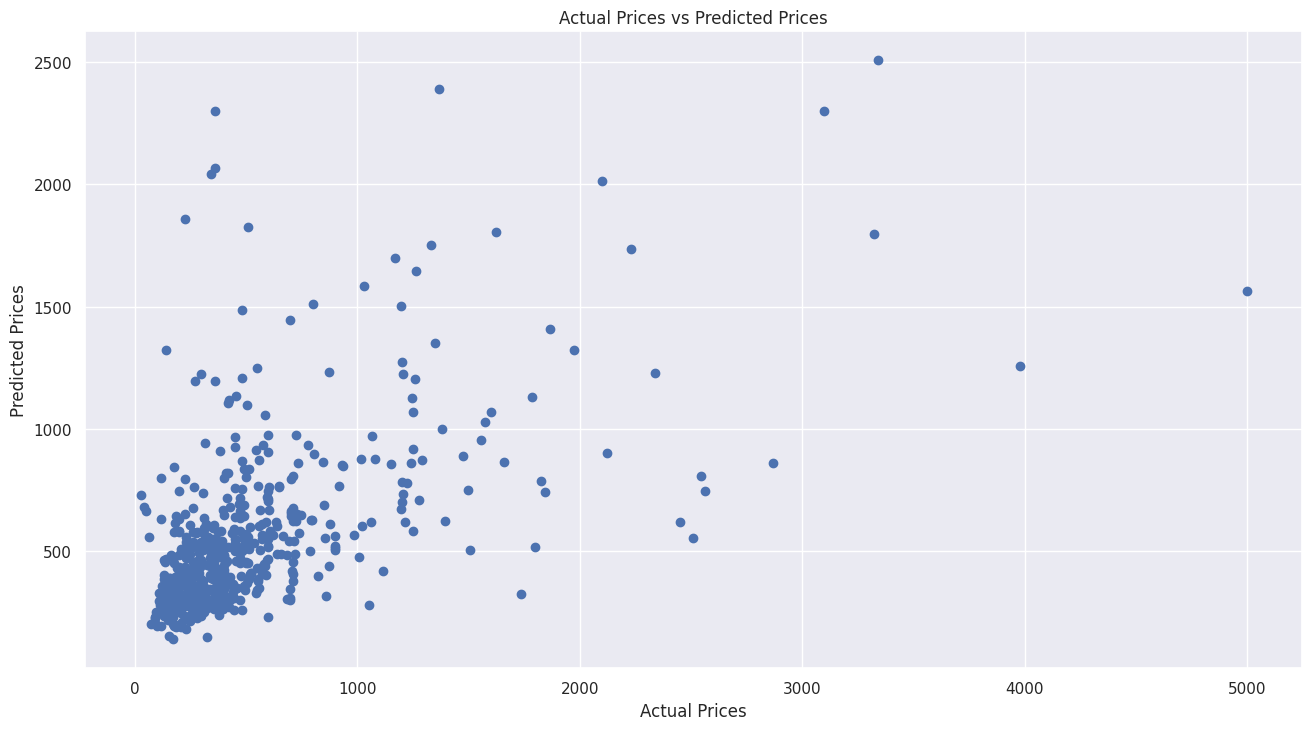

In [295]:
predictions = random_forest_regressor.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error on Test Set: {mse}')

# Plot predicted vs actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

### Feature Importance Analysis:

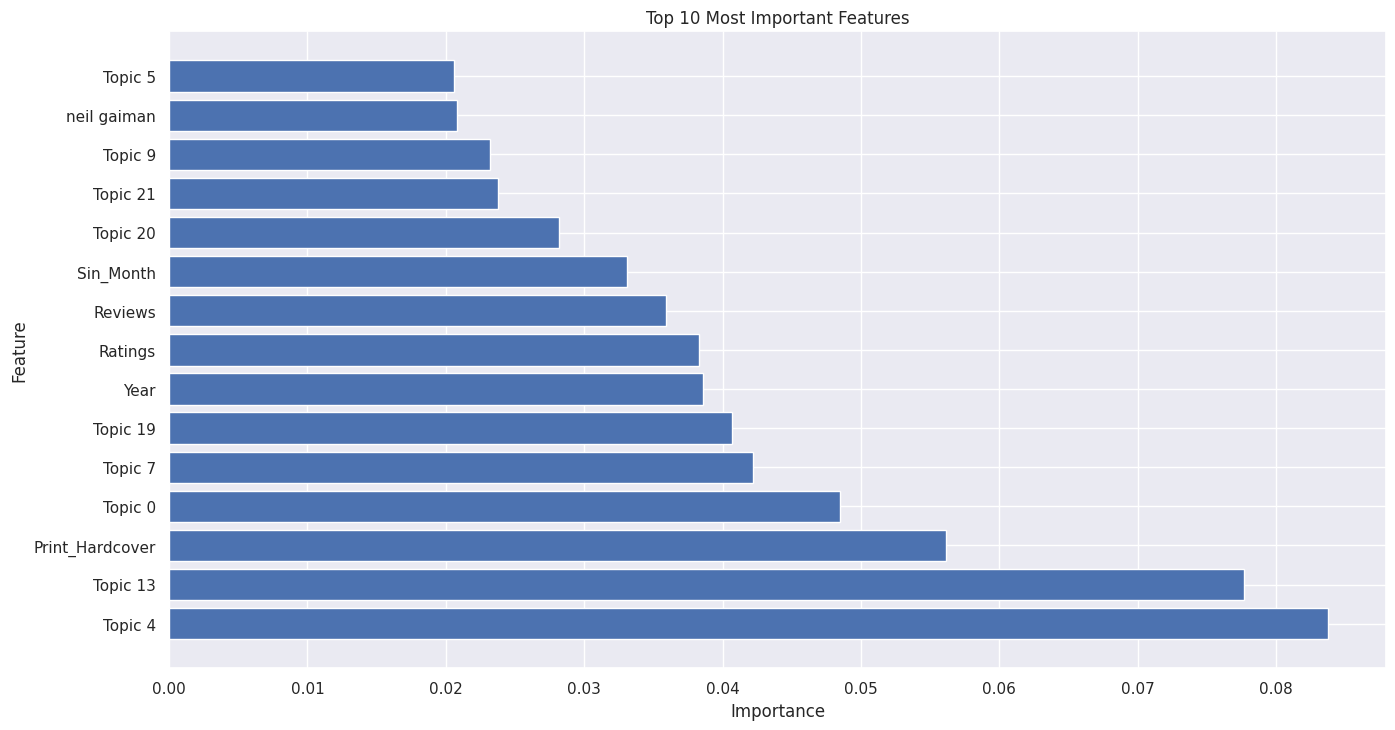

In [299]:
# Assuming 'feature_names' is a list of feature names and 'random_forest_regressor' is your trained model
feature_importances = random_forest_regressor.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Extract the top 10 most important features
top_10_features = feature_importance_df.head(15)['Feature'].tolist()

# Plot the feature importances for the top 10 features
plt.barh(top_10_features, feature_importance_df.head(15)['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.show()